
# Training The CNN to identify karstified areas


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

import keras

import os

Using TensorFlow backend.


## Importing the Data

In [14]:
path = "D:/Masterarbeit/Data/Randbereiche/data.npz"
filename = "data.npz"
categorical = True
class_weighted = True

In [13]:
from Data import get_data_from_npz

In [15]:
train_examples, test_examples, train_labels_category, test_labels_category, class_weights, datagen = get_data_from_npz(path, filename, categorical, class_weighted)

(array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
         [[-3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
          [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
          [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
          ...,
          [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
          [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38],
          [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38]],
 
         [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          ...,
    

In [4]:
print(train_labels.shape)
print(test_labels.shape)

print("number of samples:" + str(test_labels.shape[0] + train_labels.shape[0]))

(6532, 128, 200, 3)
(1632, 128, 200, 3)
number of samples:8164


In [294]:
batches = datagen.flow(train_examples ,train_labels_category , batch_size = batch_size)

x_batch , y_batch = next(batches)

C:\Users\Veigel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


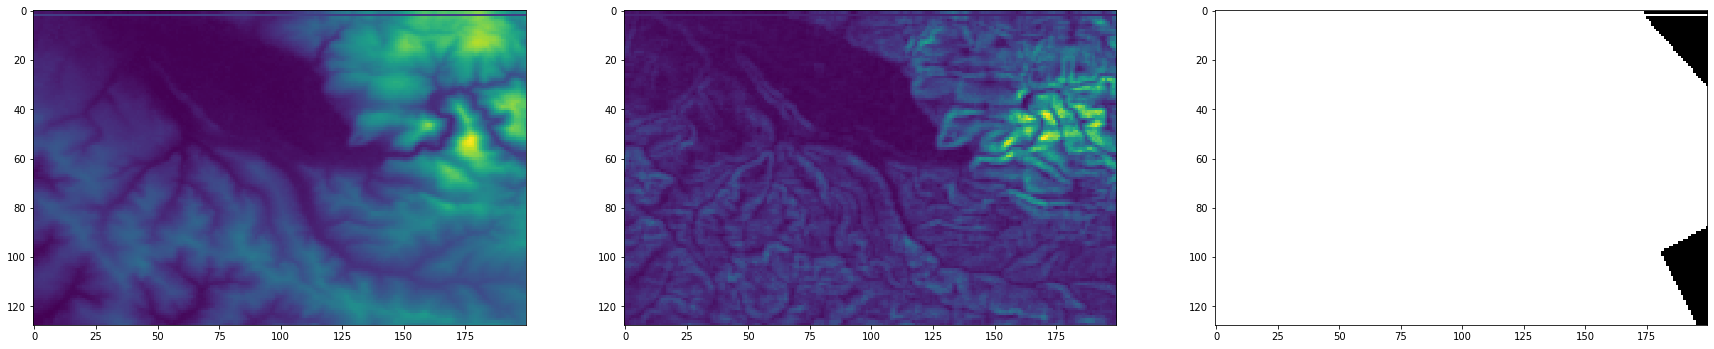

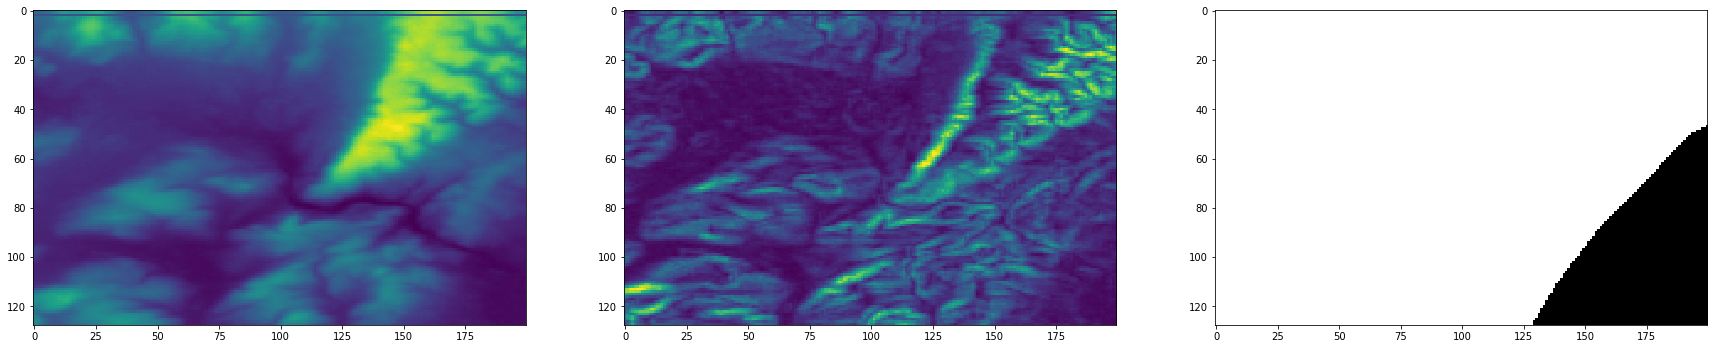

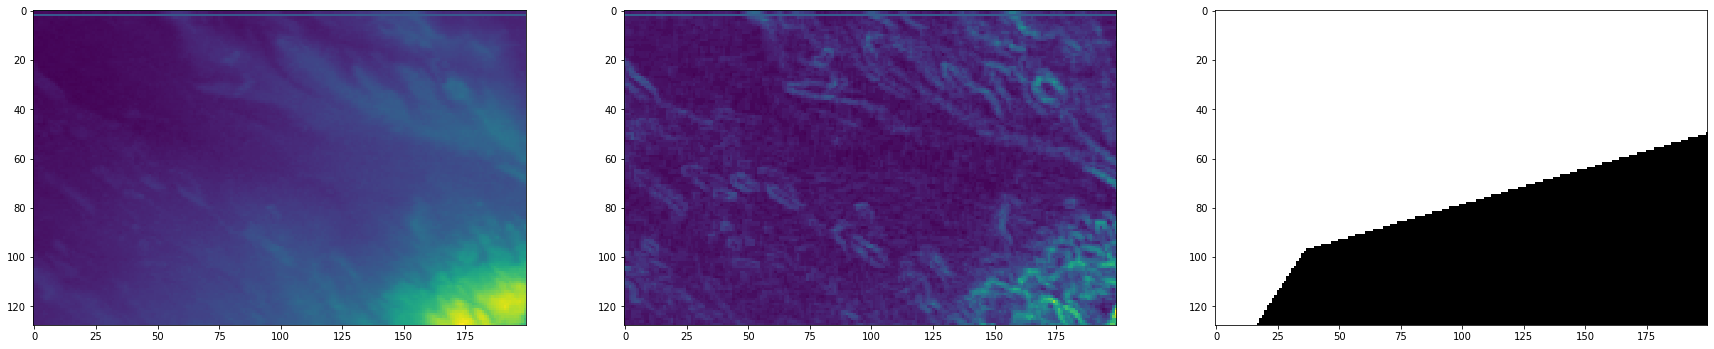

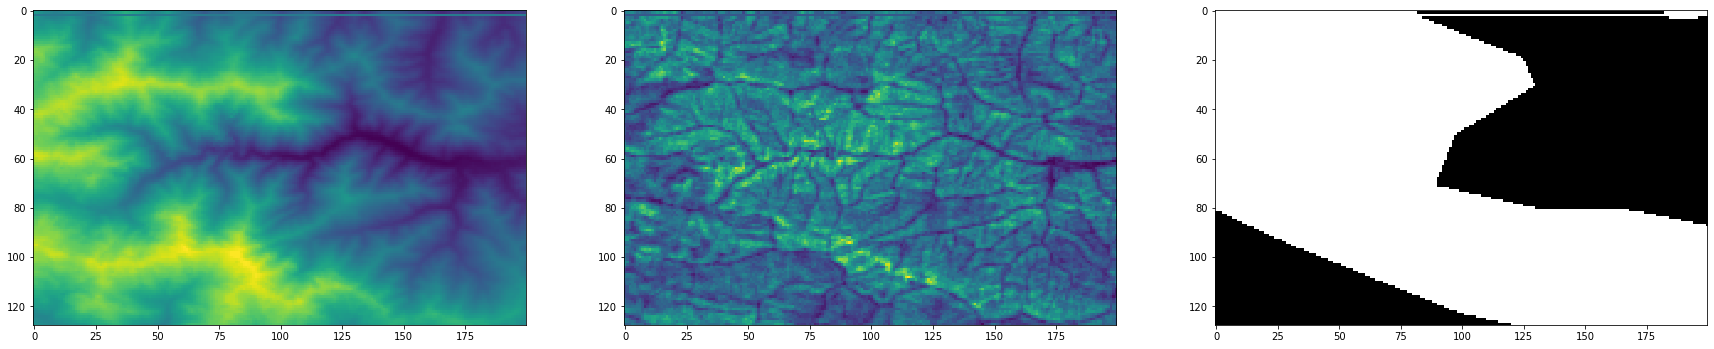

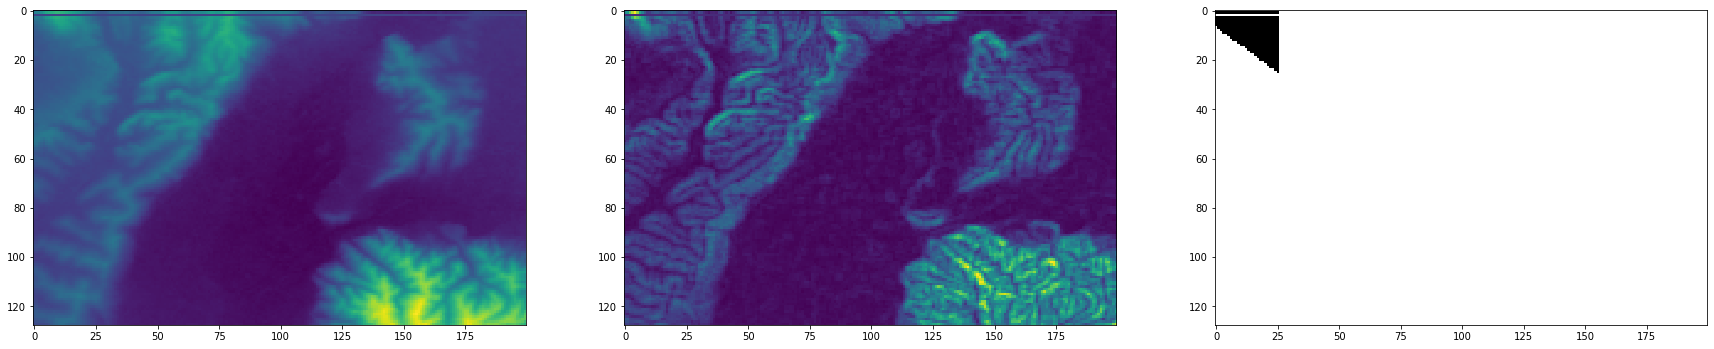

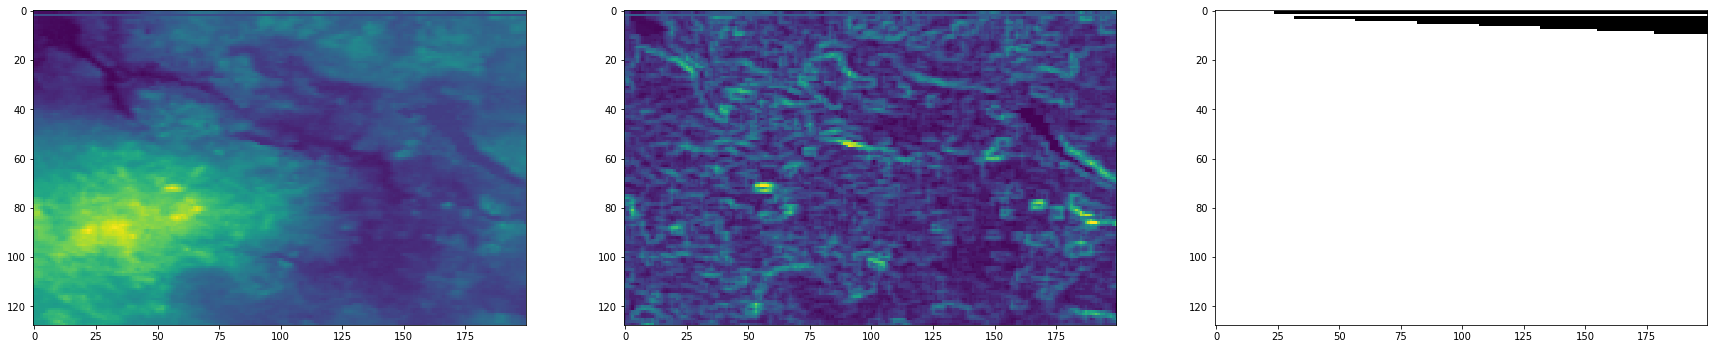

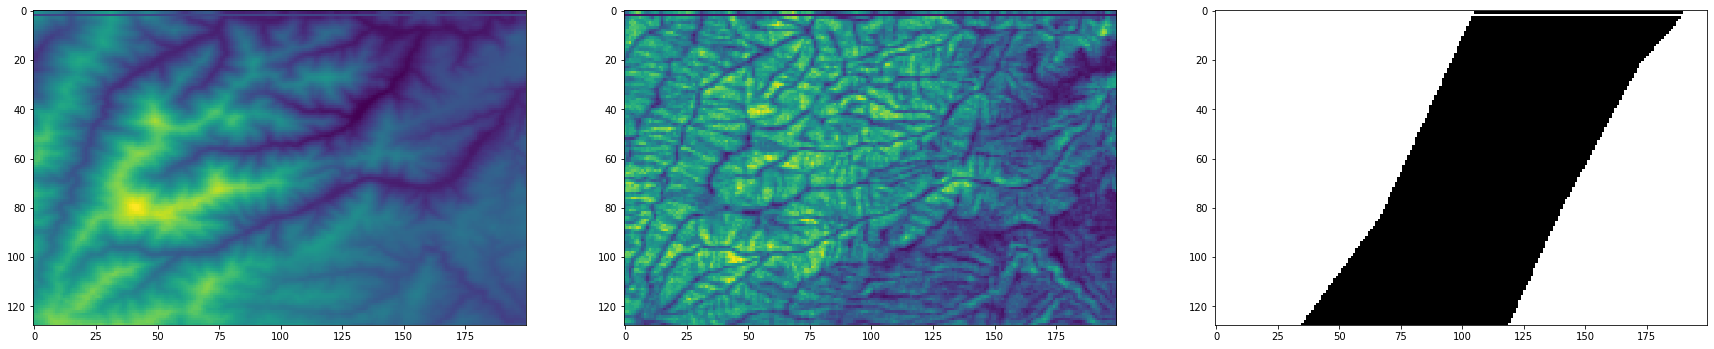

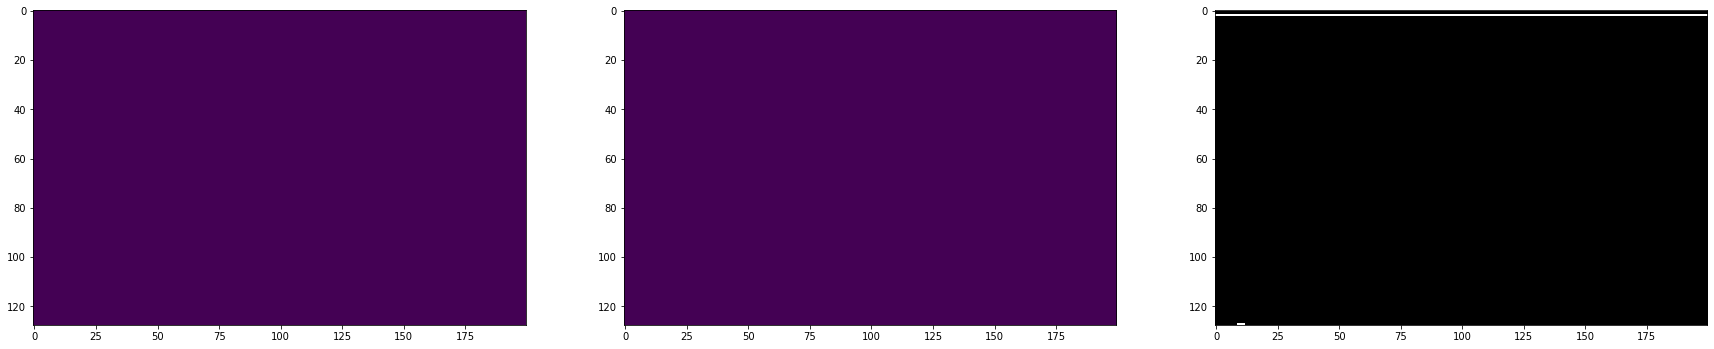

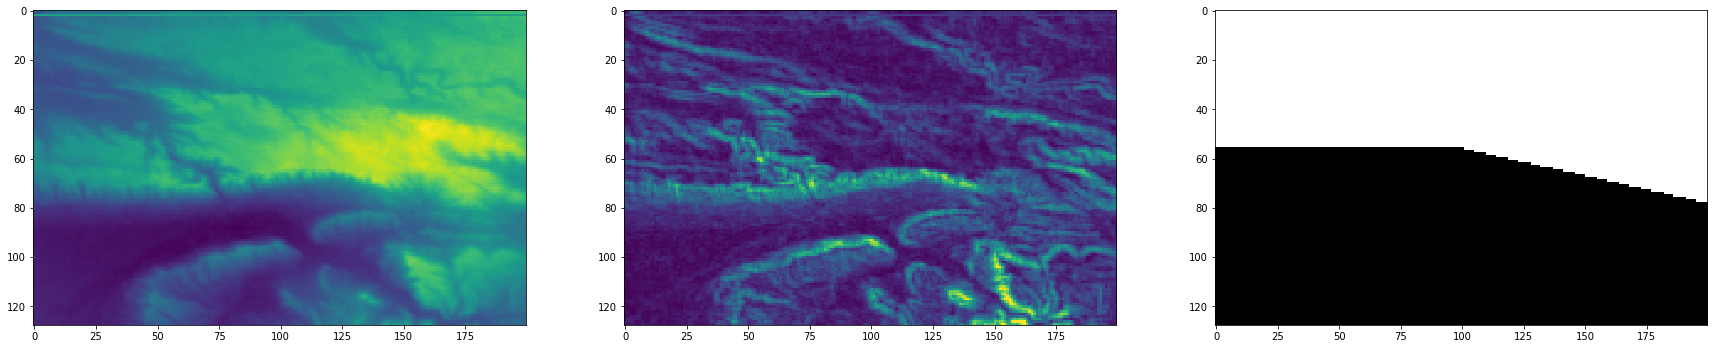

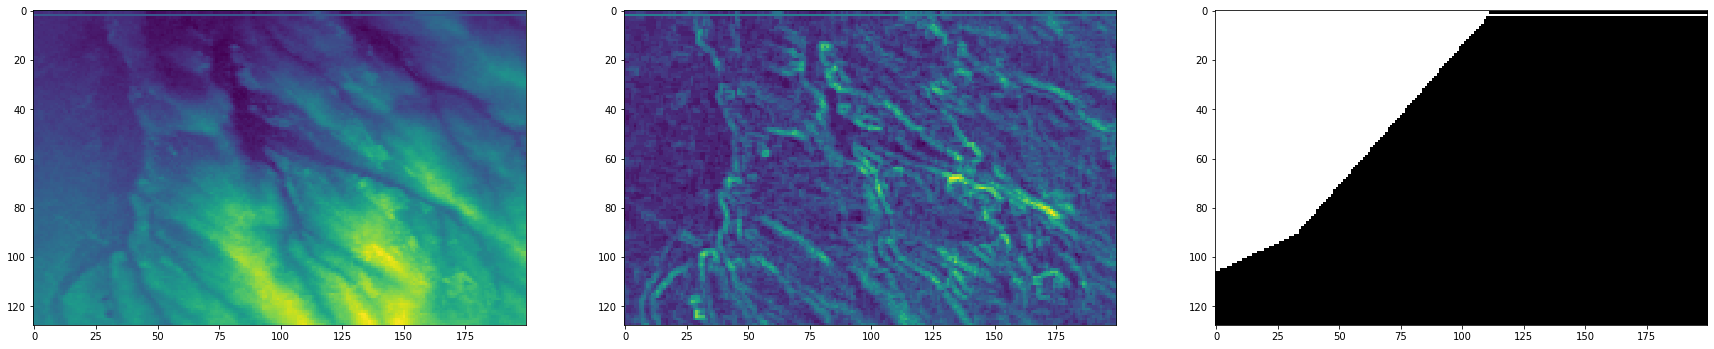

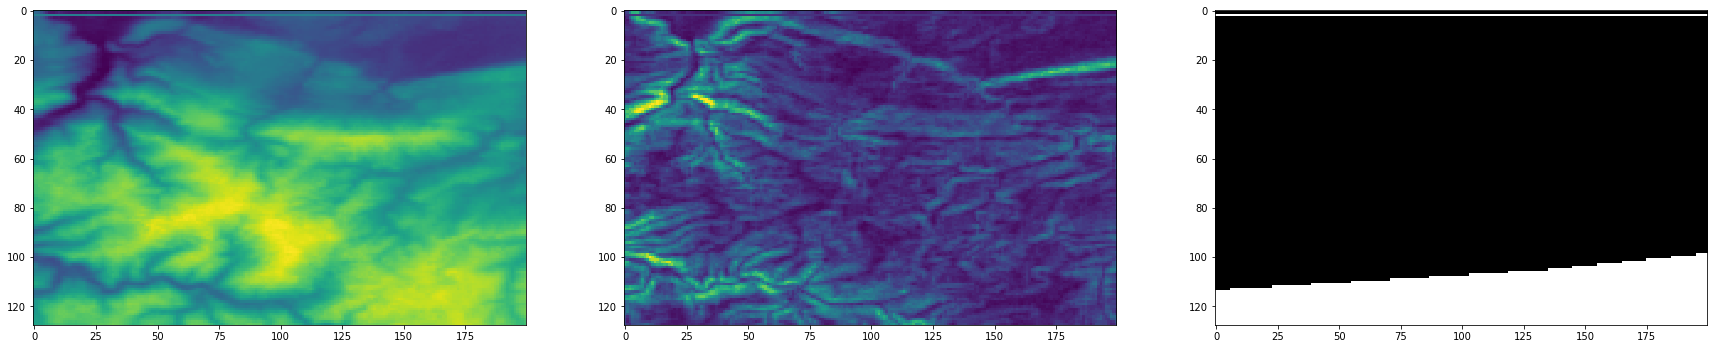

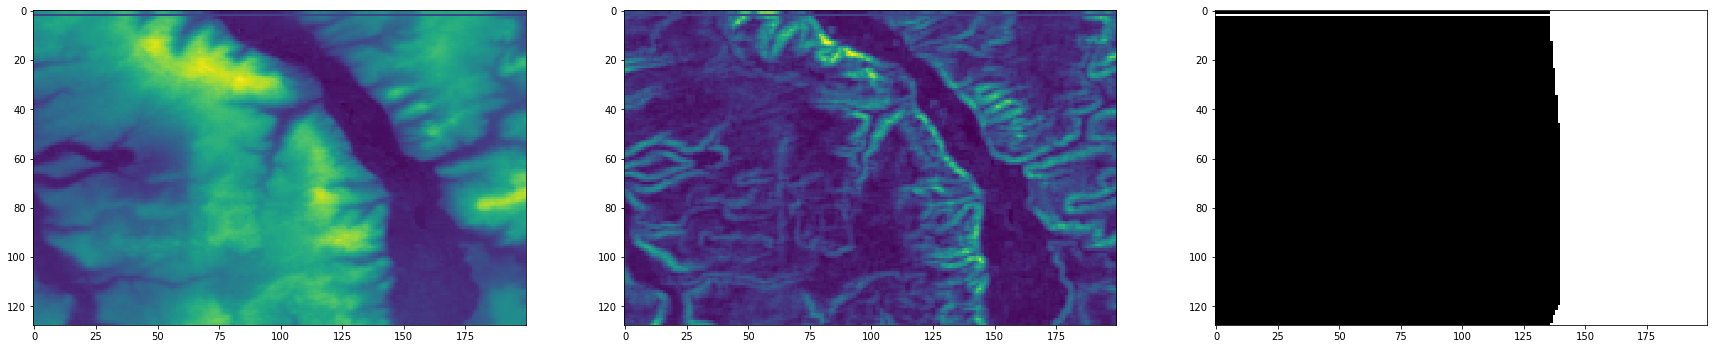

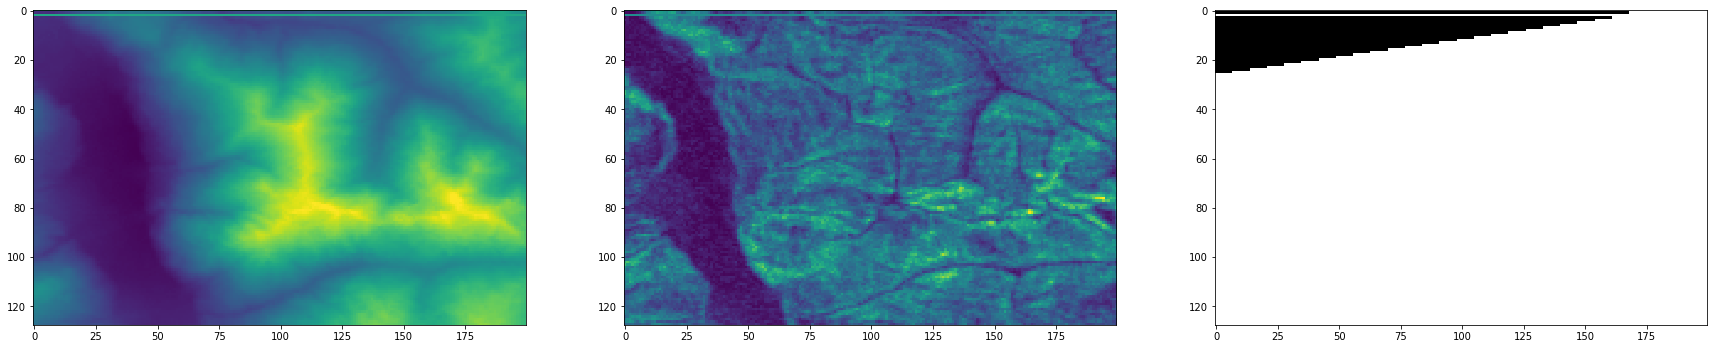

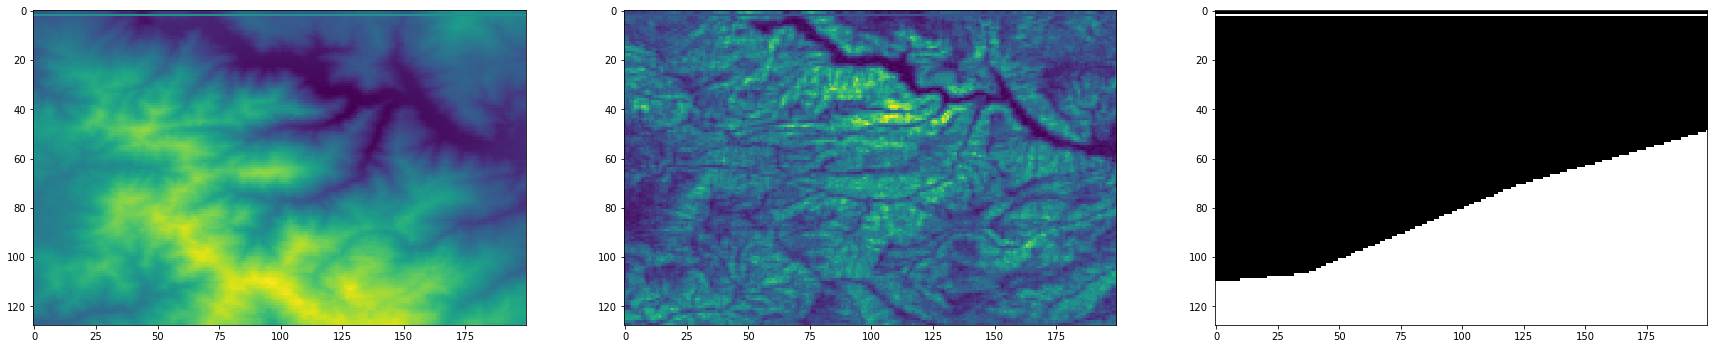

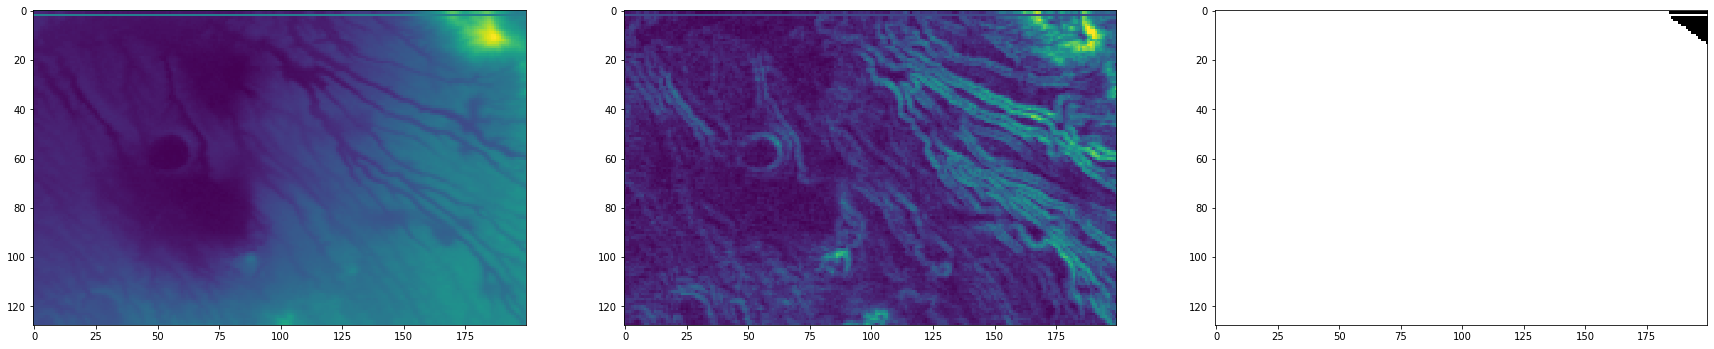

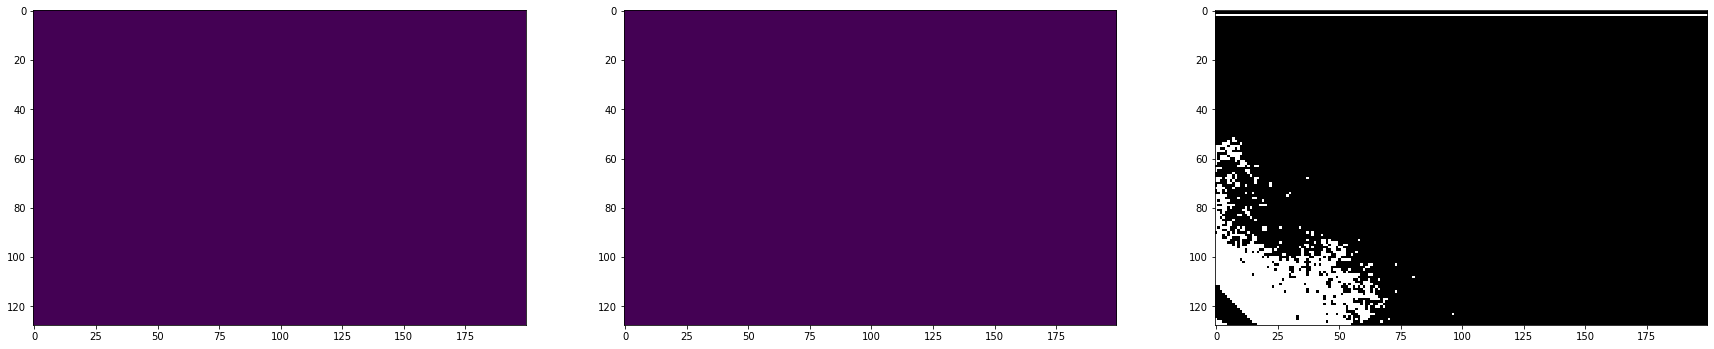

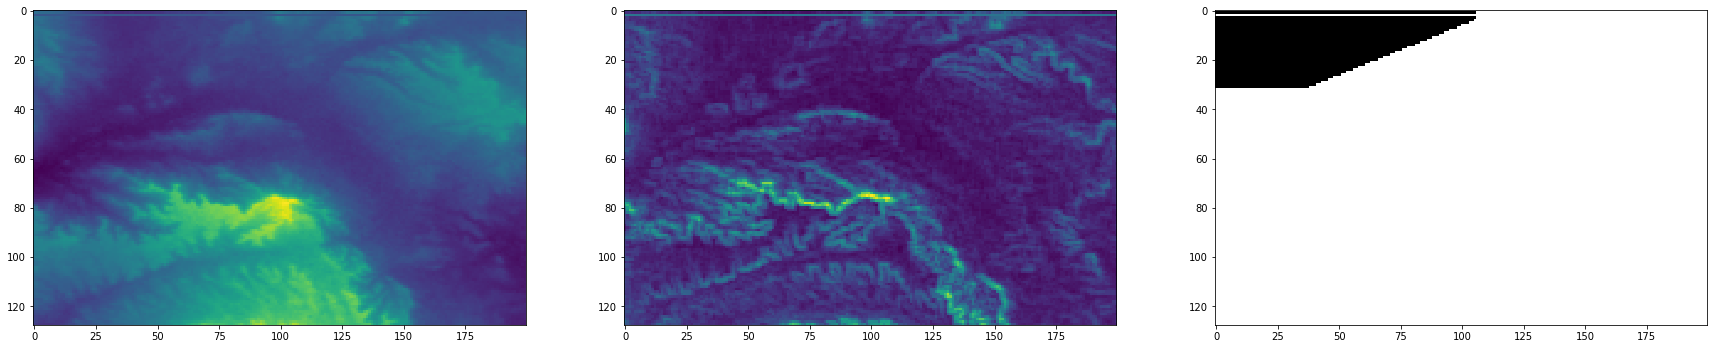

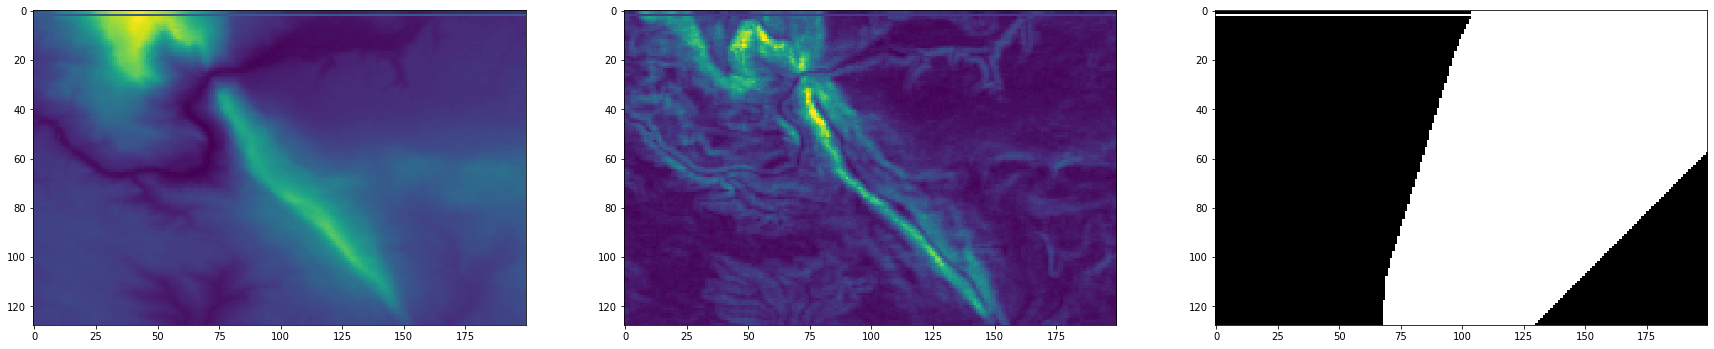

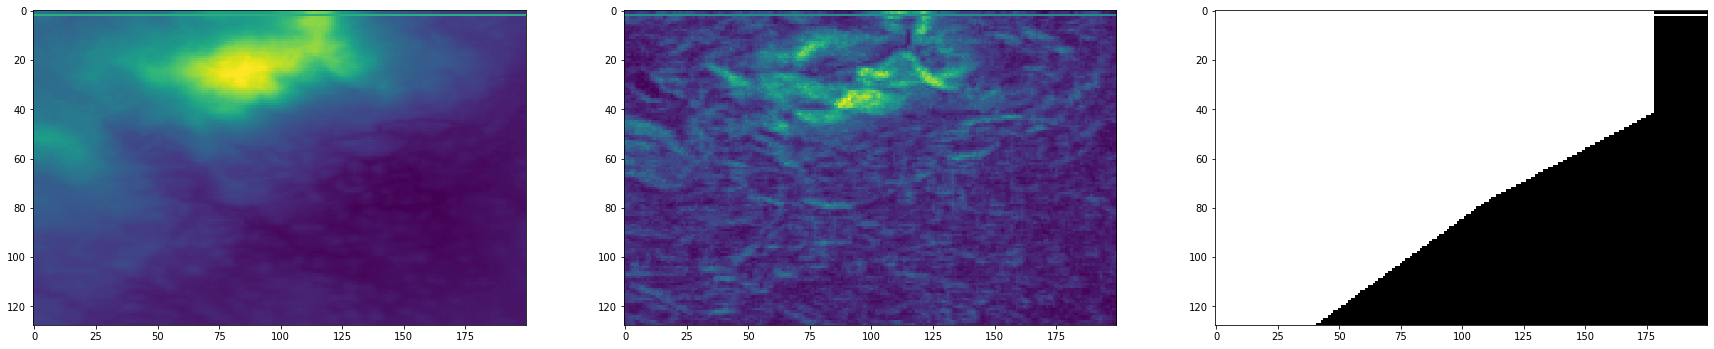

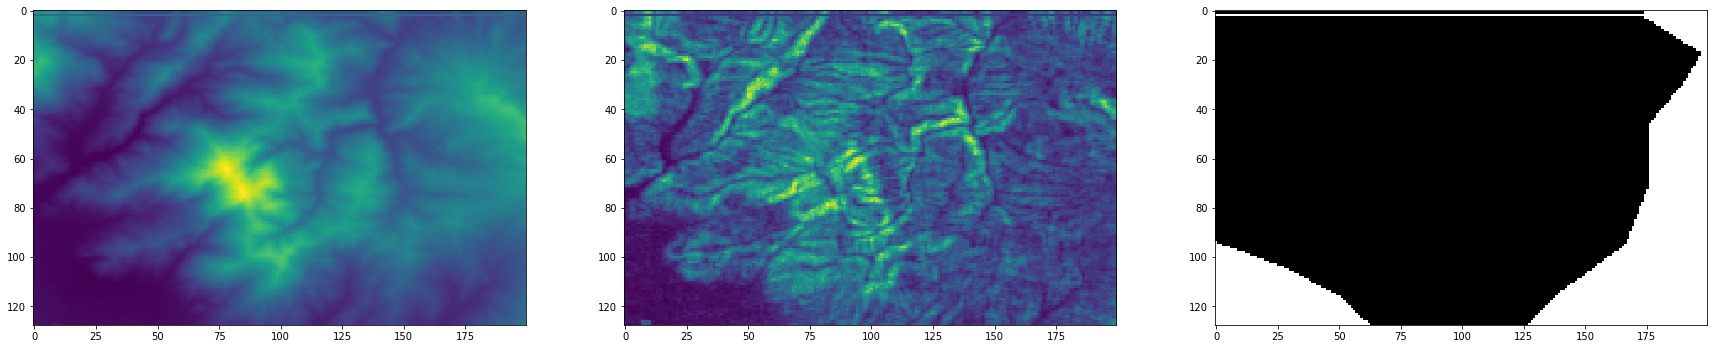

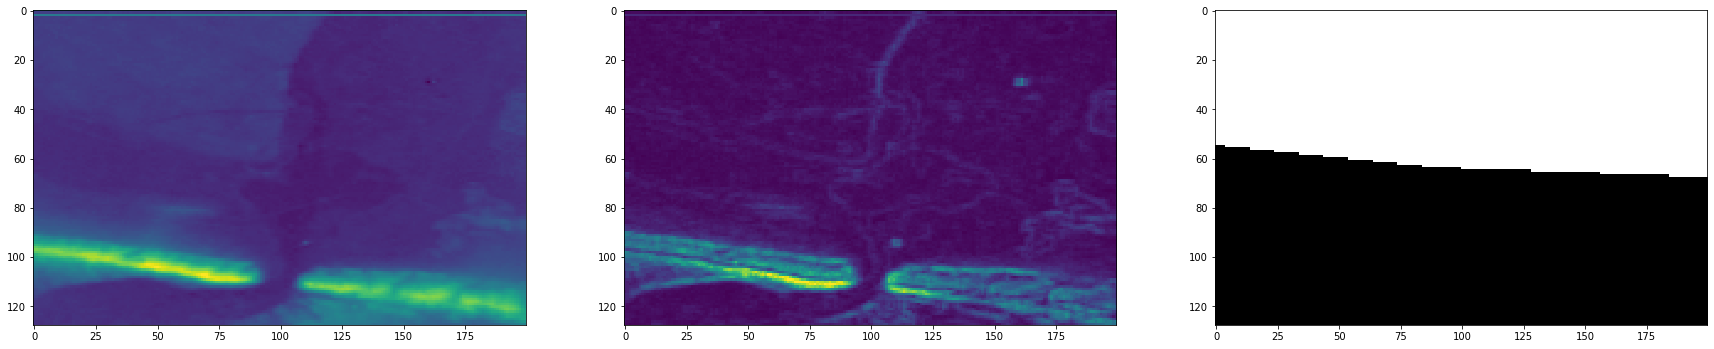

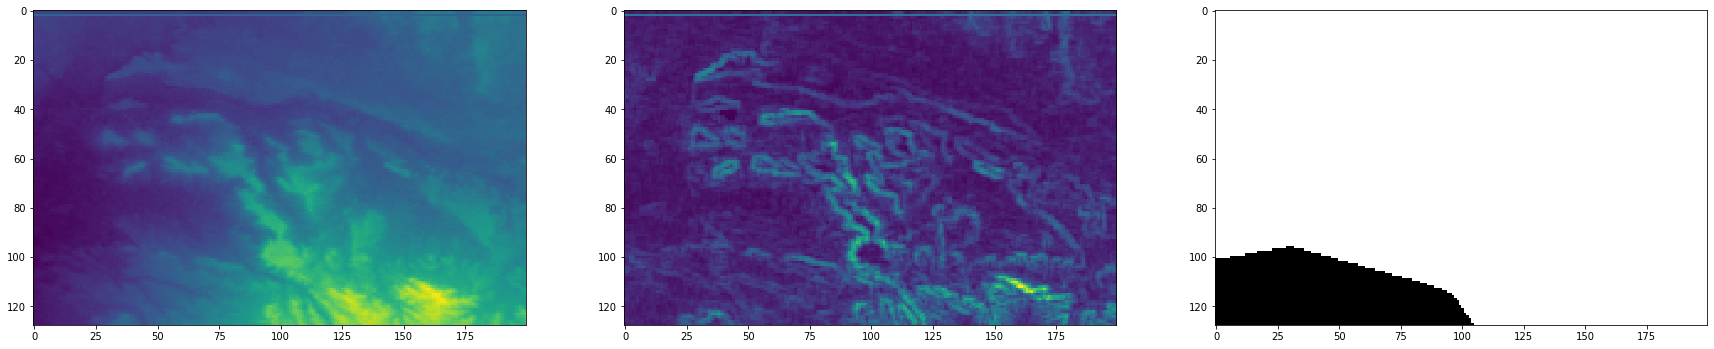

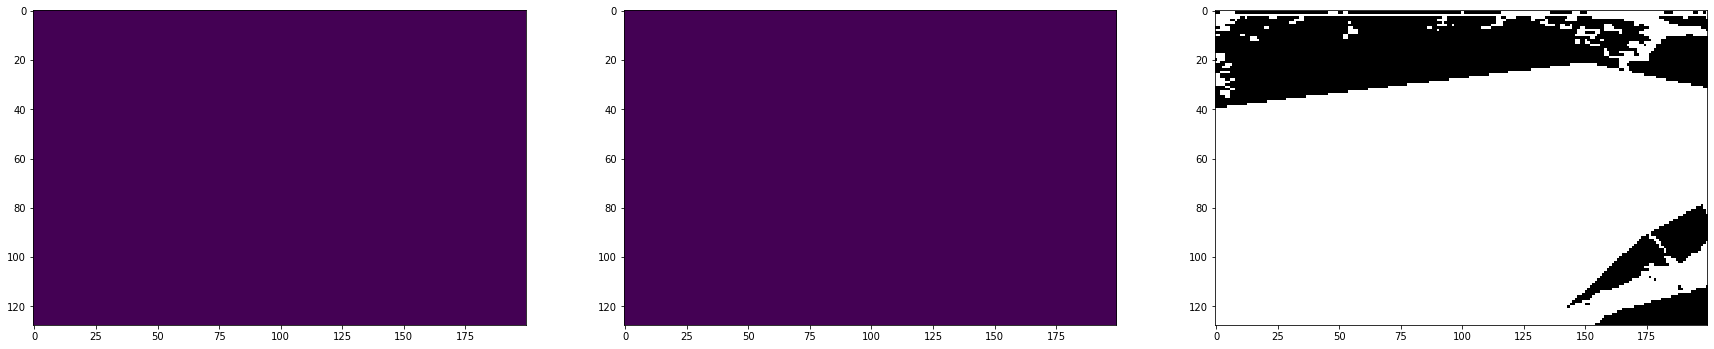

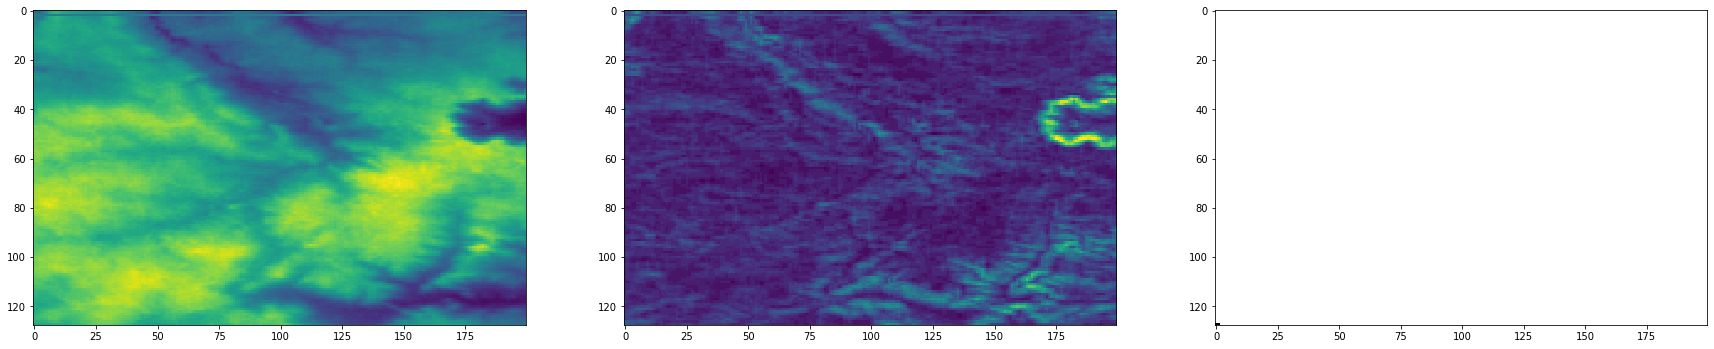

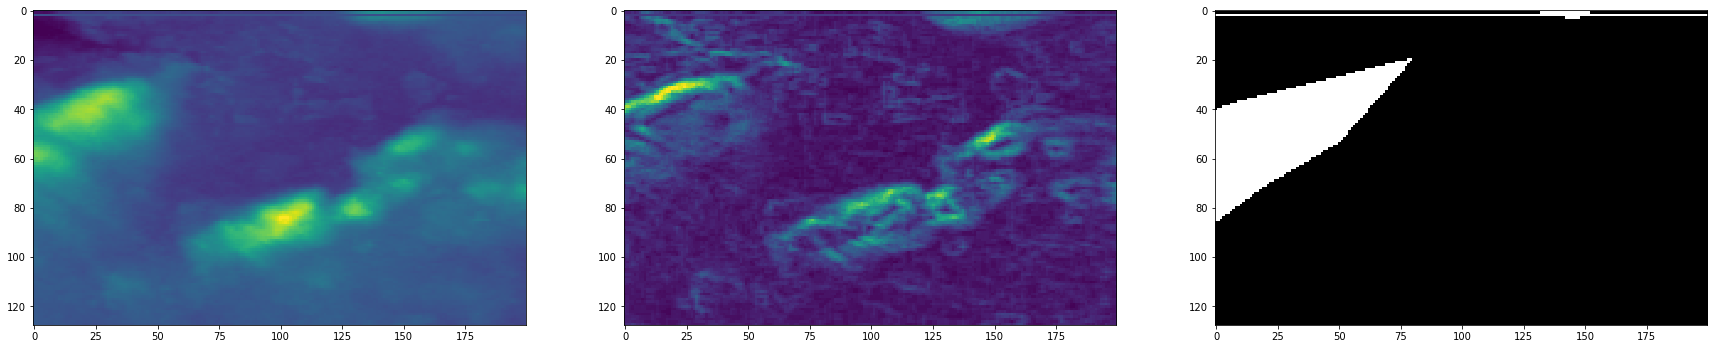

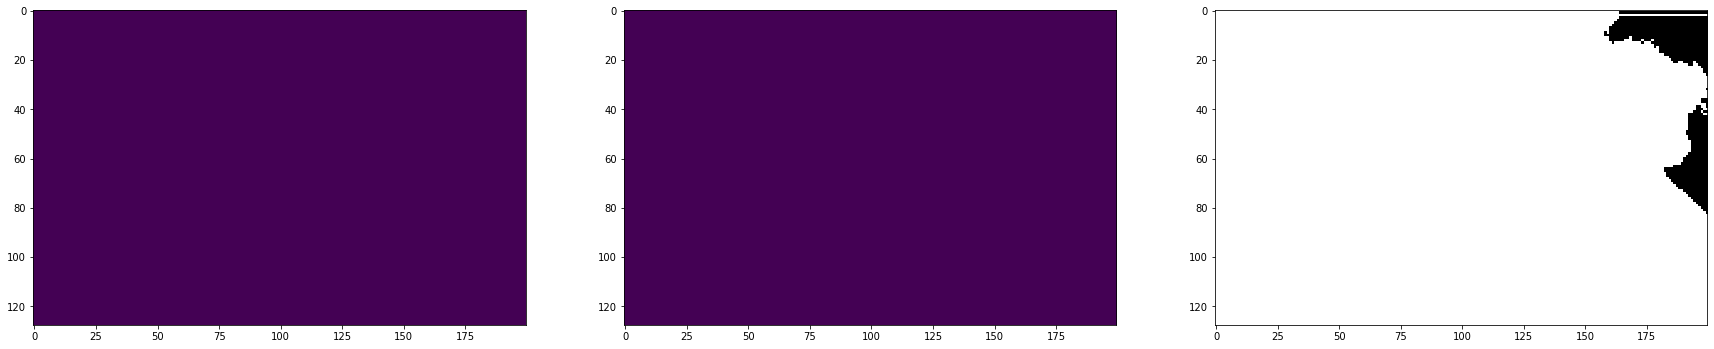

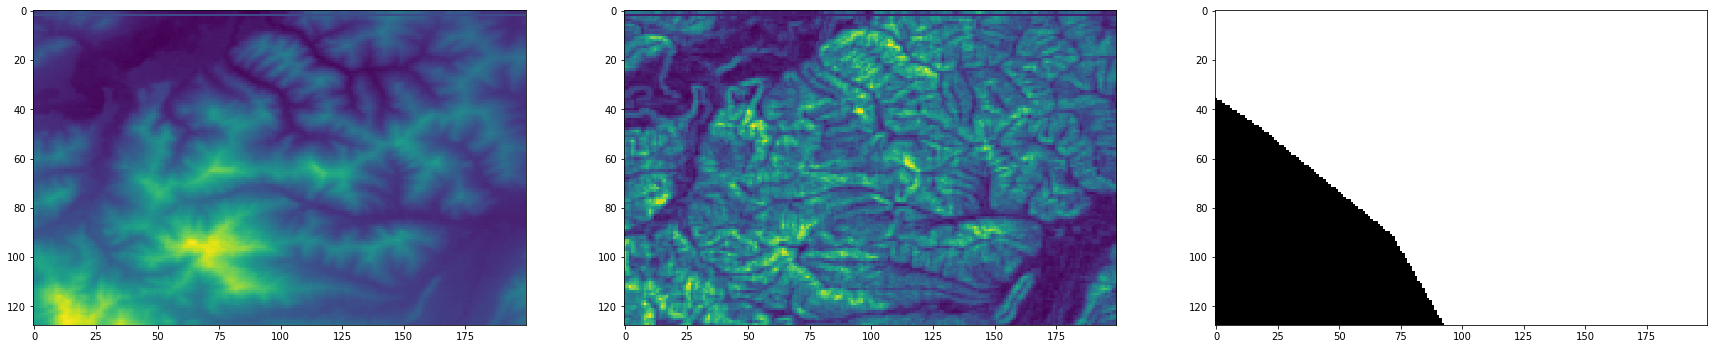

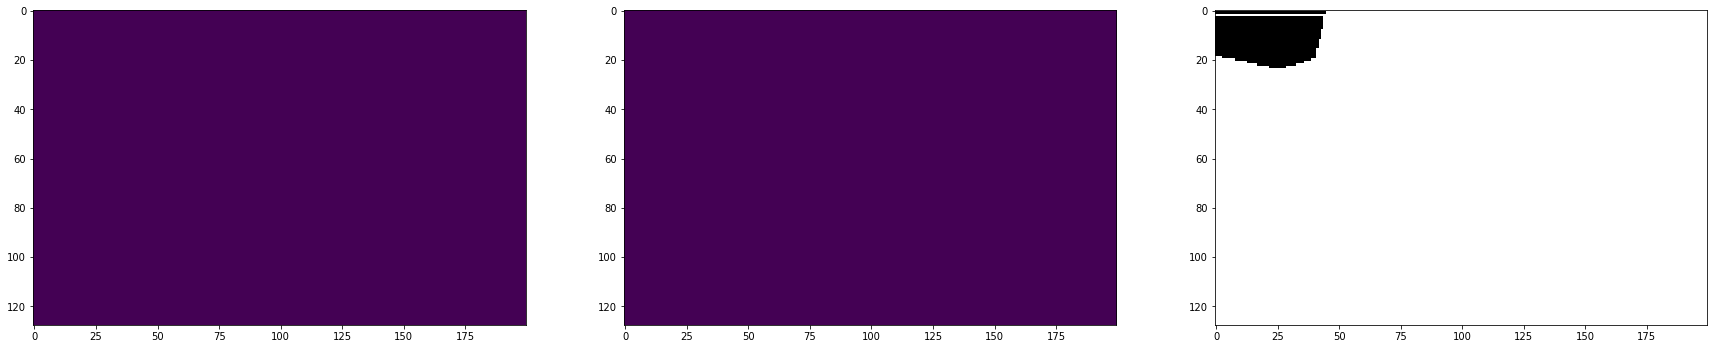

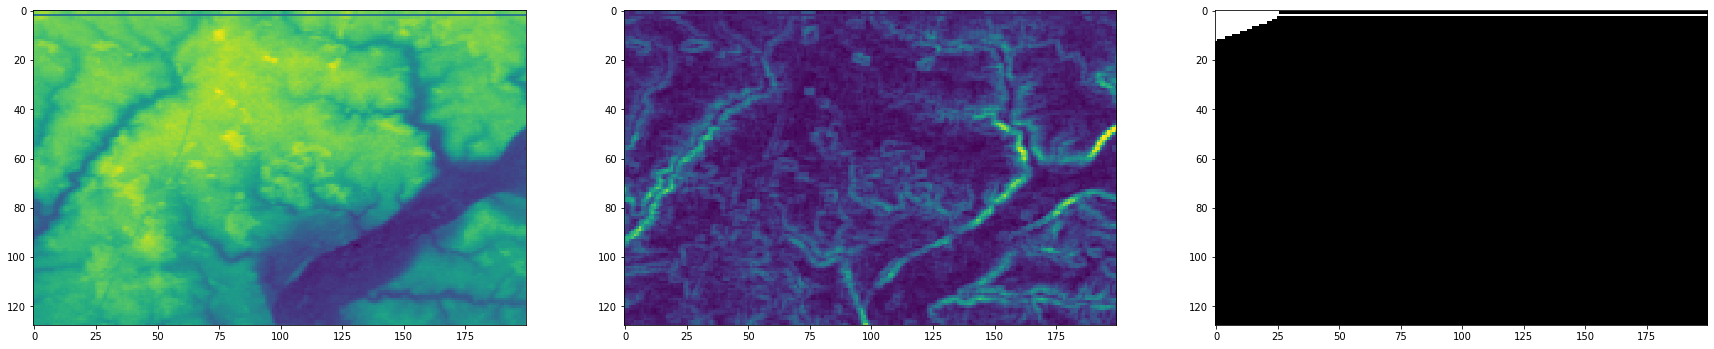

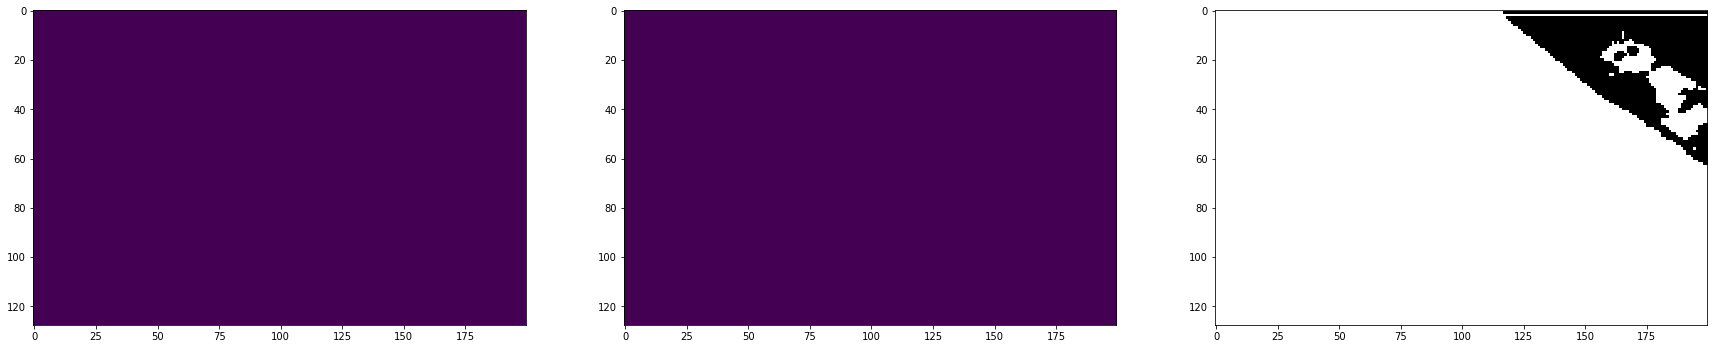

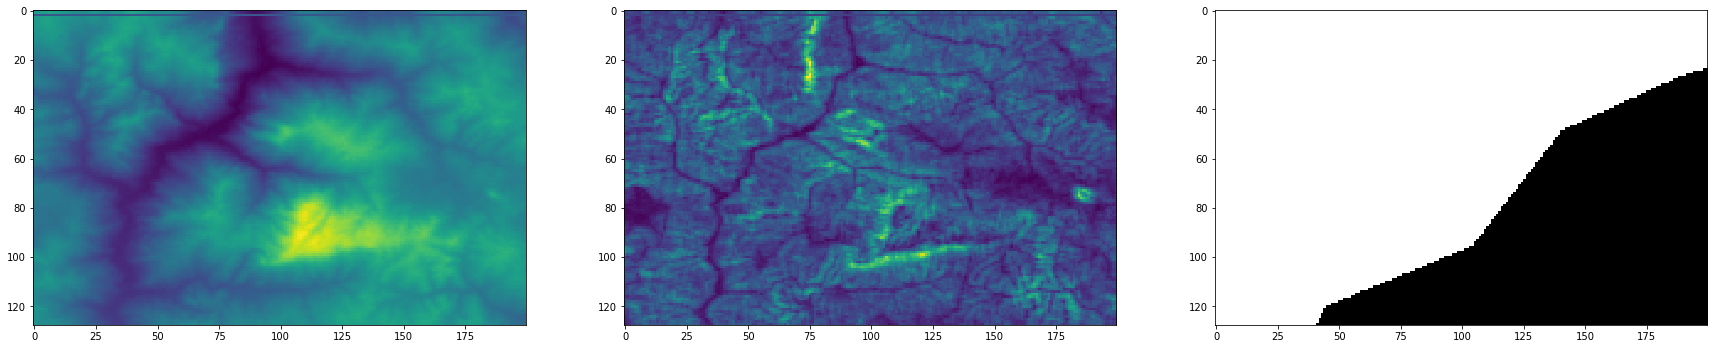

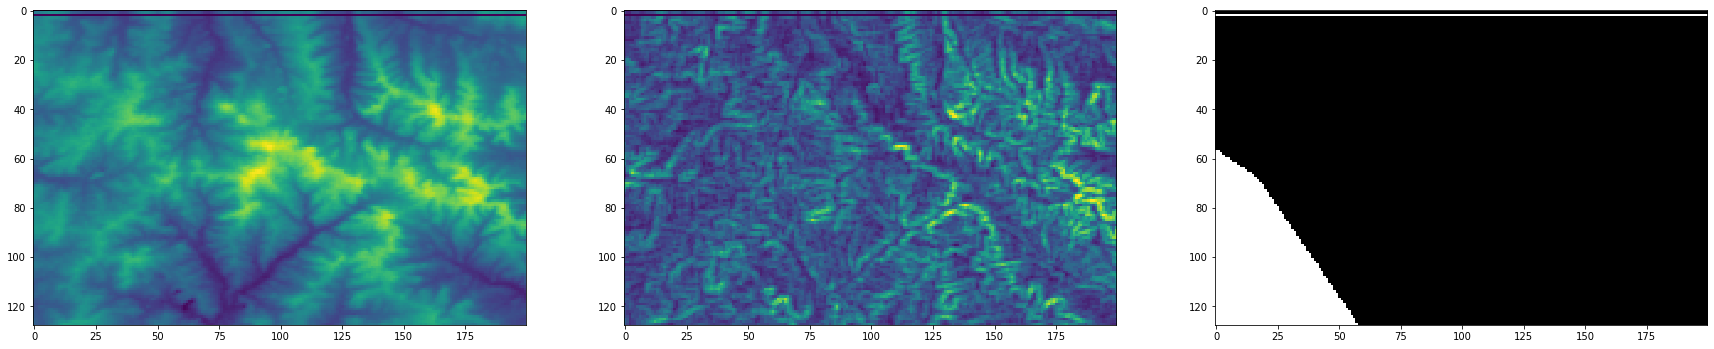

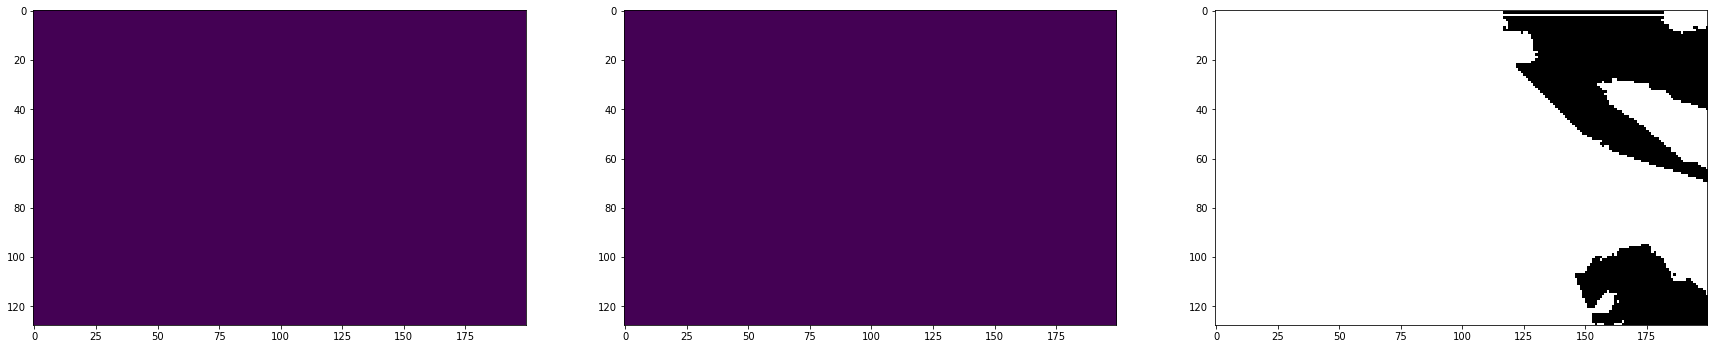

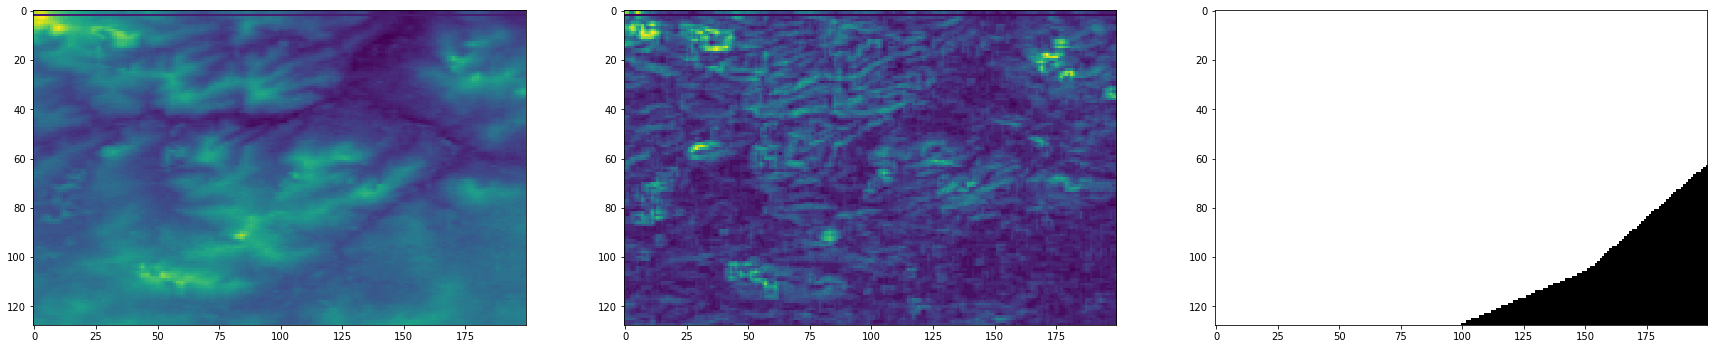

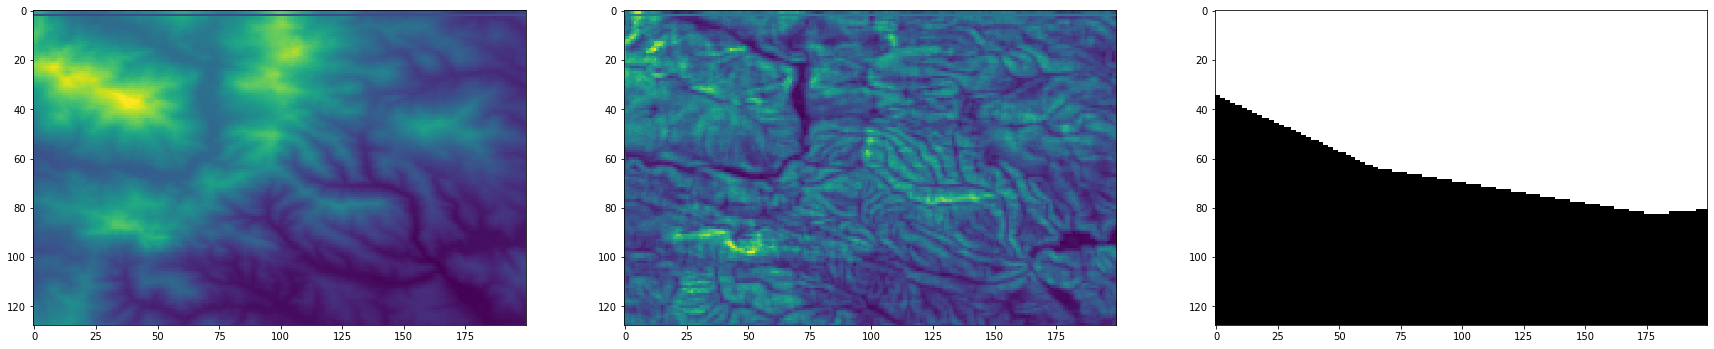

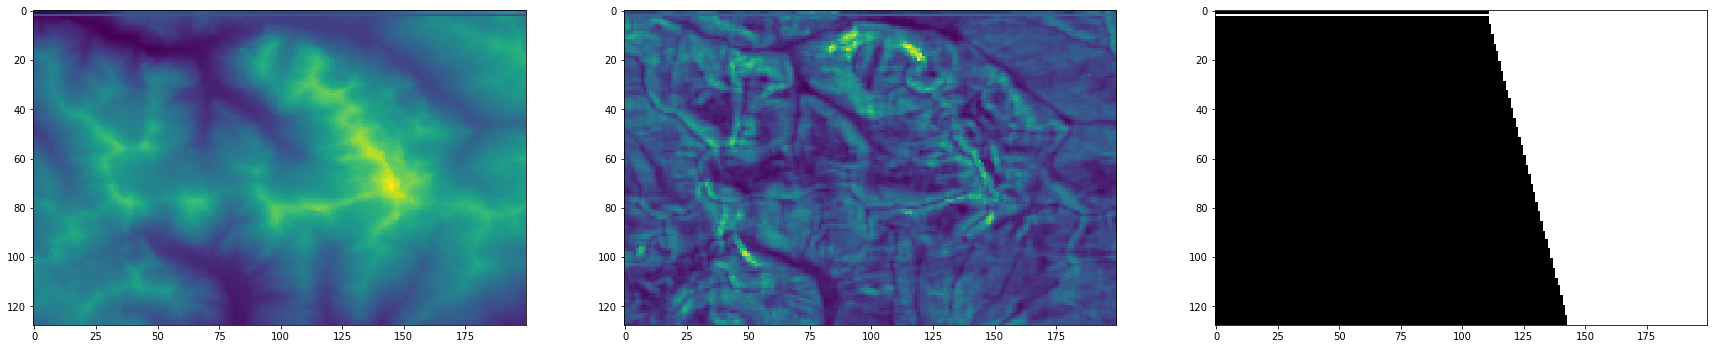

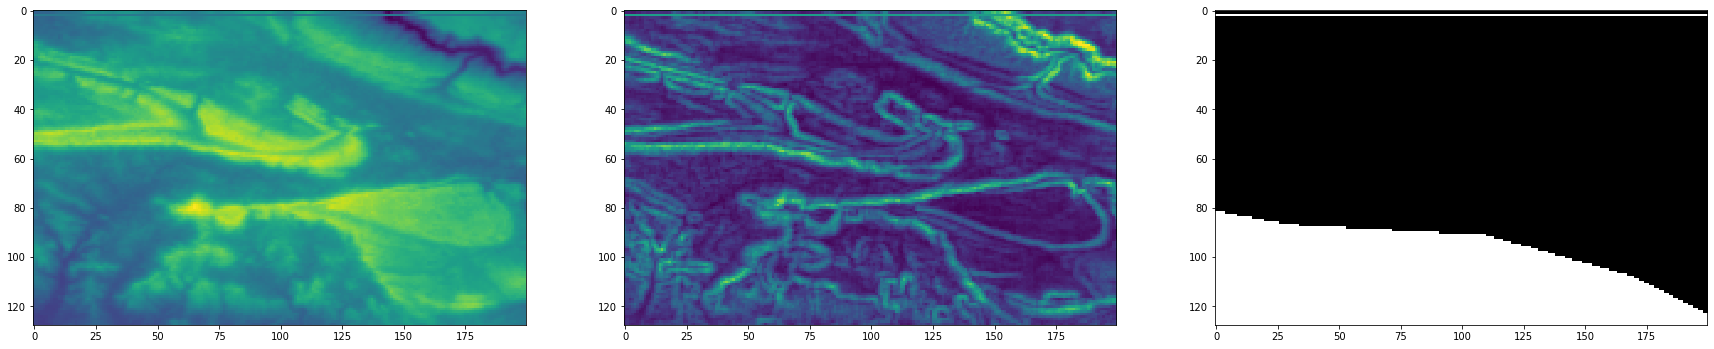

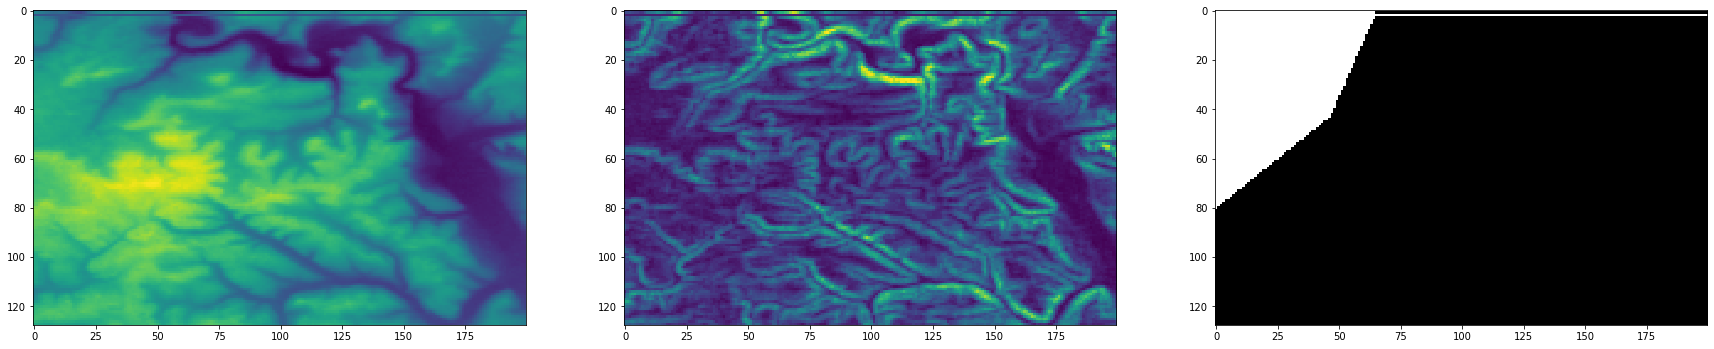

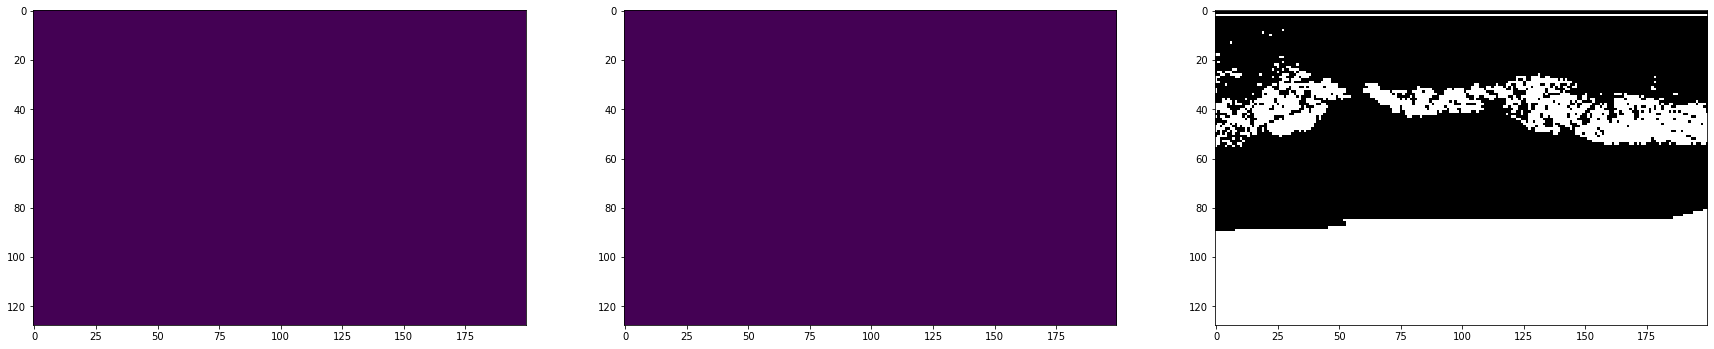

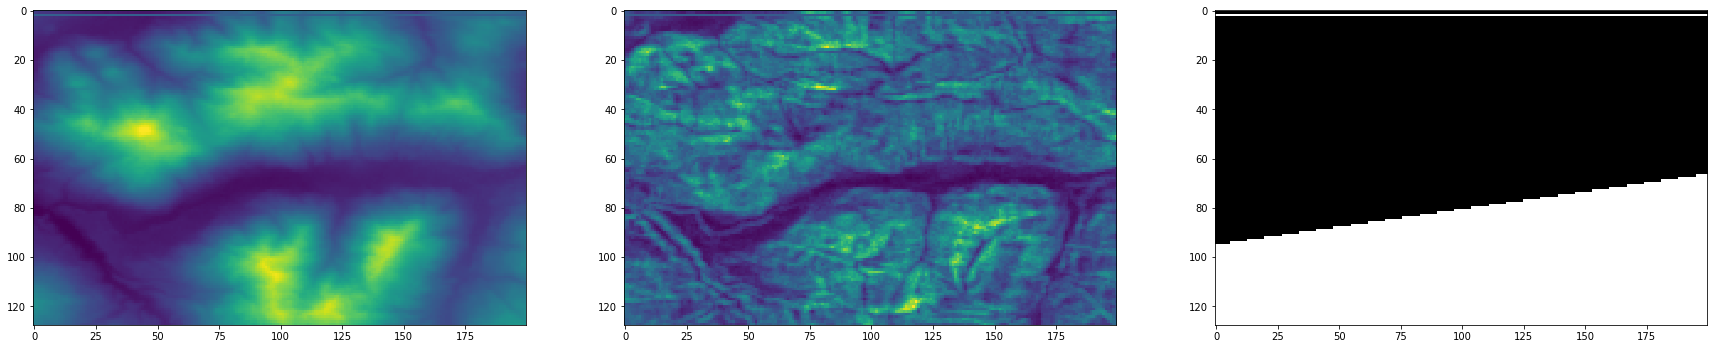

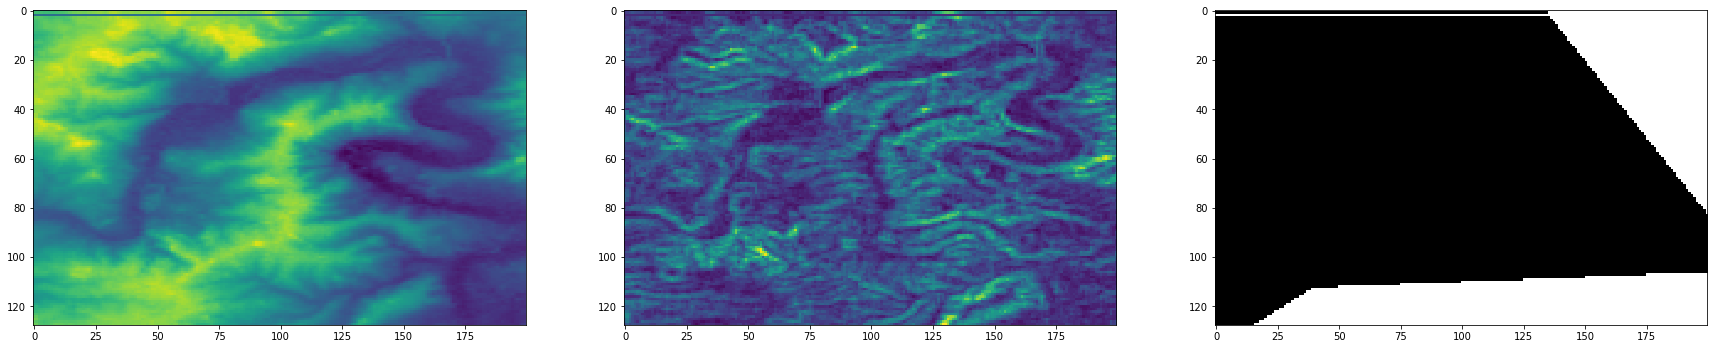

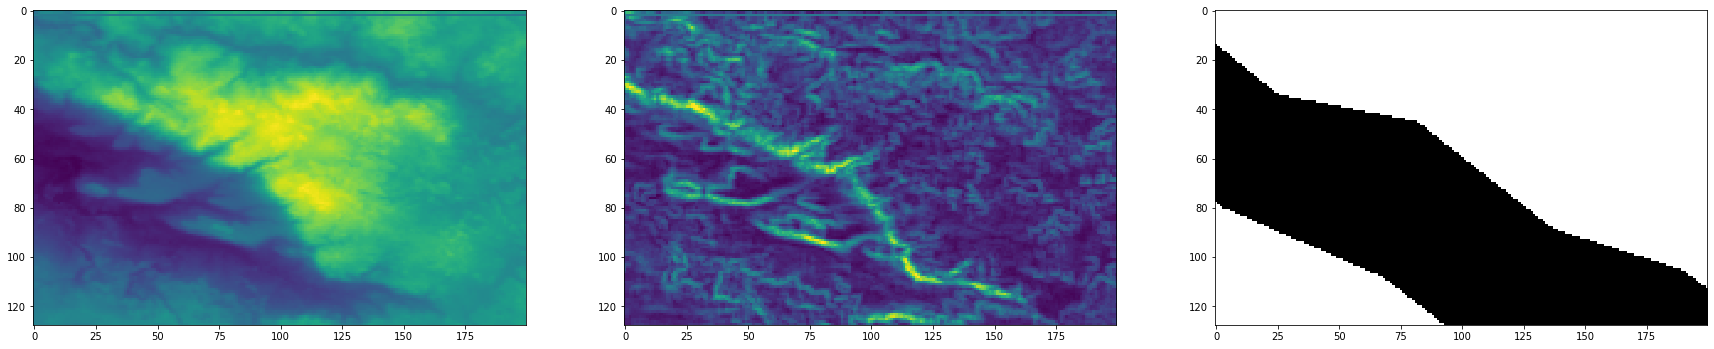

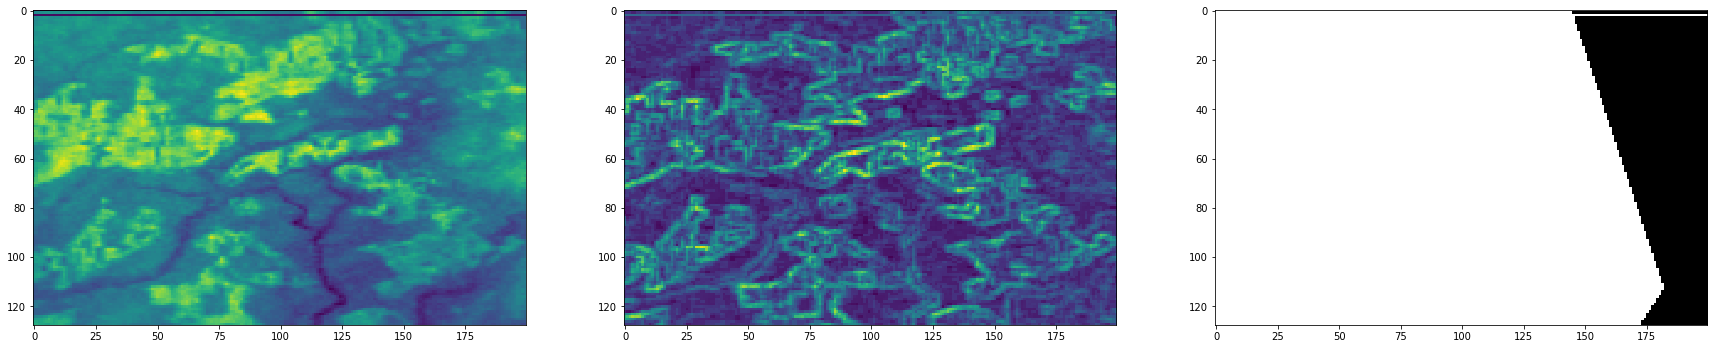

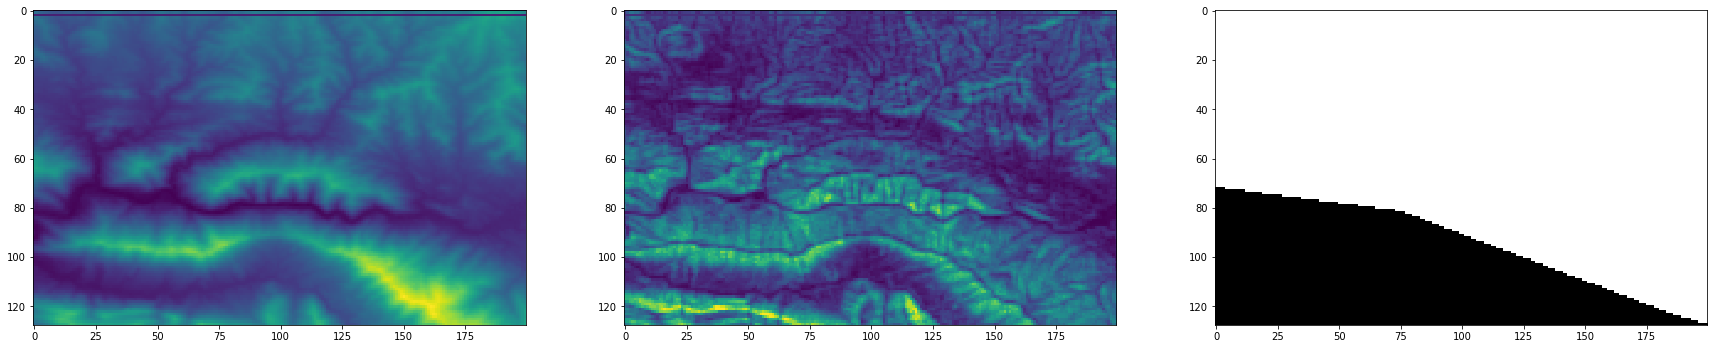

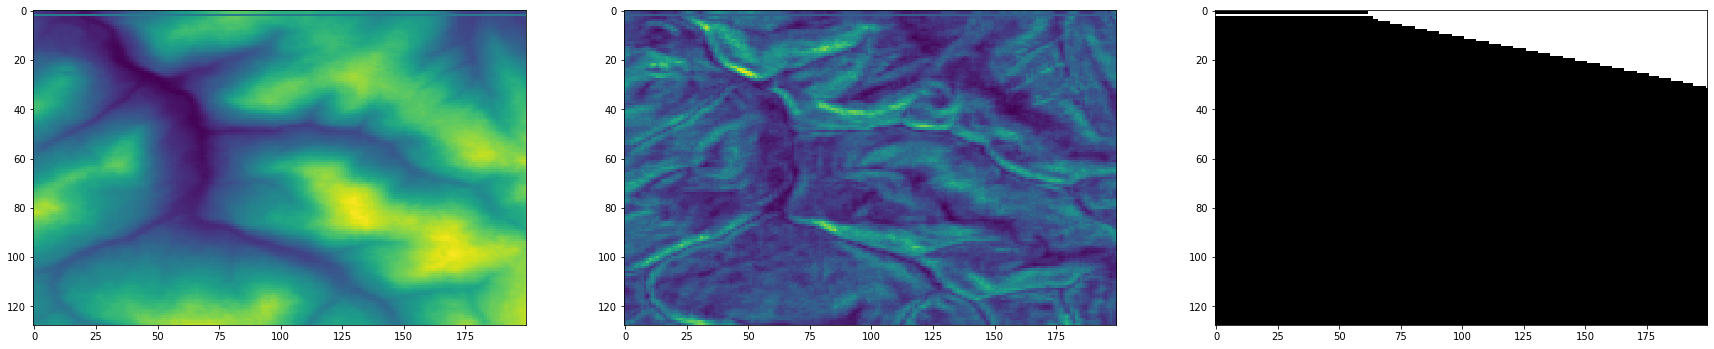

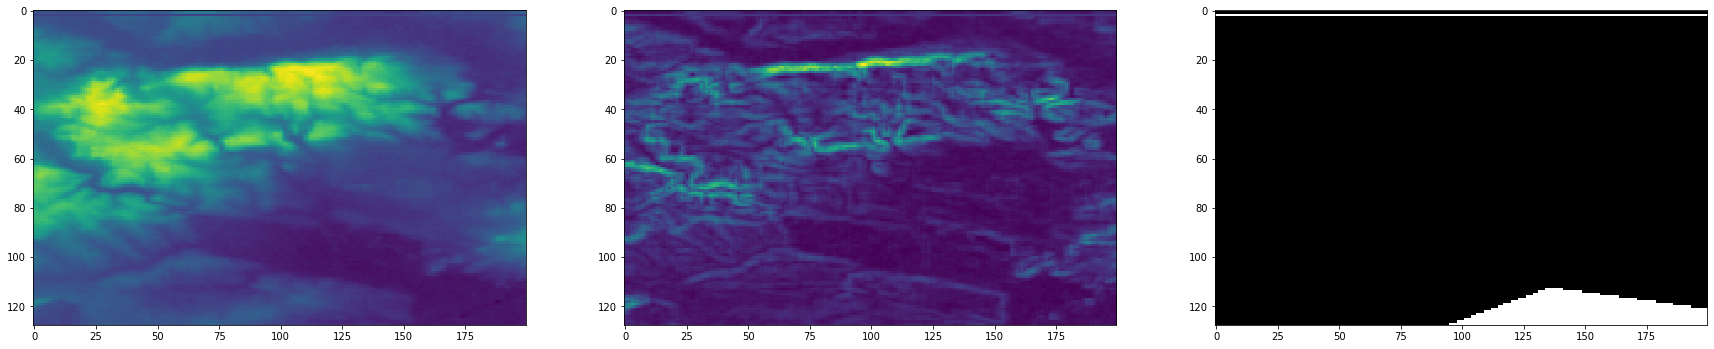

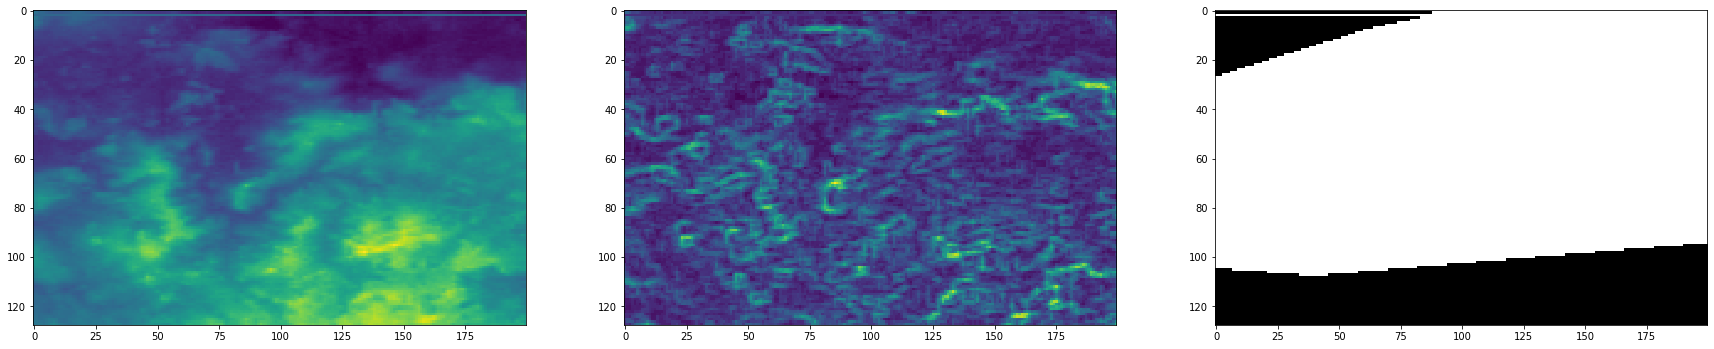

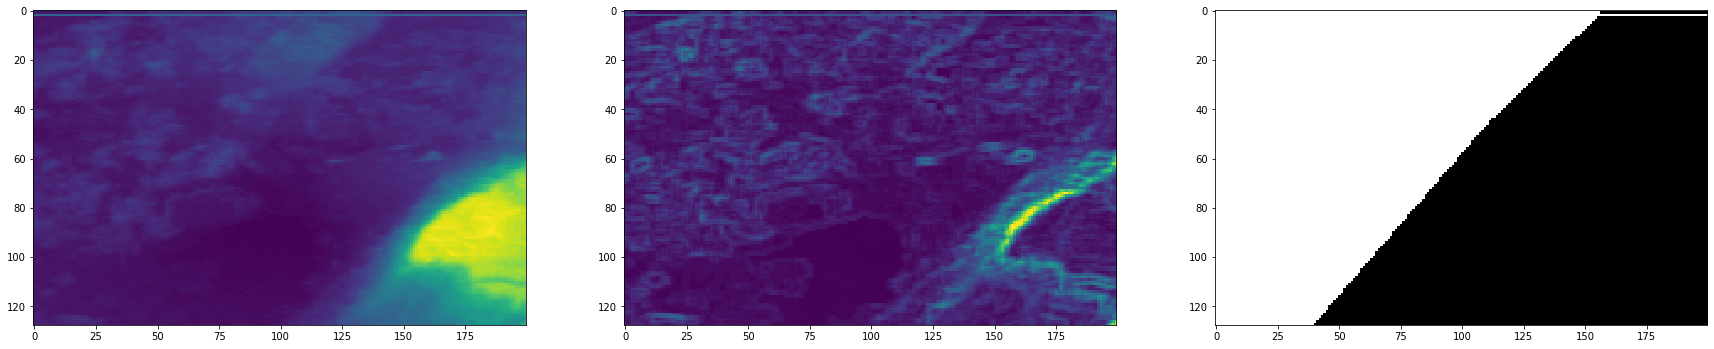

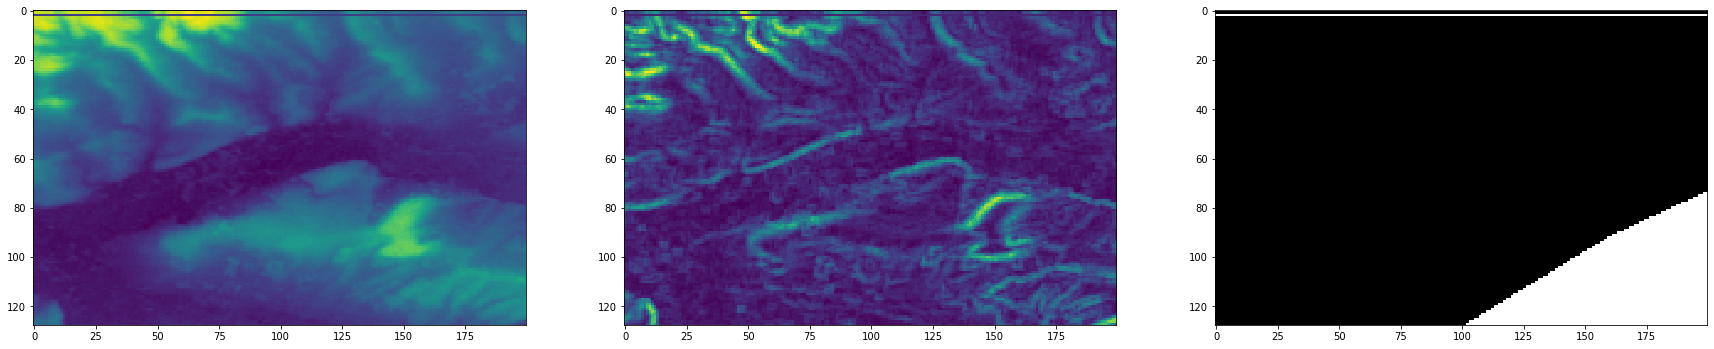

In [295]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("C:/Users/Veigel/Pictures/Memos/first_batch.pdf") as pdf:
    for i in range (0,49):

        dgm = x_batch[i]
        
        dgm = x_batch[:,:,0]        
        slope = x_batch[:,:,1]
        flowdir = x_batch[:,:,2]
        
        mask = y_batch[i].reshape(128,200,2)
        mask = mask[:,:,1]


        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(30,15))
        im1 = ax1.imshow(dgm)
        im2 = ax2.imshow(slope)
        im2 = ax3.imshow(flowdir)
        im3 = ax4.imshow(mask, cmap = "Greys")
        
        ax1.suptitle('elevation tile '+ i, fontsize=20)
        ax2.suptitle('slope tile '+ i, fontsize=20)
        ax3.suptitle('flow direction tile '+ i, fontsize=20)
        ax4.suptitle('mask tile '+ i, fontsize=20)
        
        plt.xlabel('number of pixels', fontsize=18)
        plt.ylabel('number of pixels', fontsize=18)
        
        pdf.savefig(fig)

In [290]:
plt.close(fig="all")

## Setting training Parameters

In [12]:
num_epochs = 200
batch_size = 50
num_samples = train_labels.shape[0]
num_samples_val = test_labels.shape[0]
steps_per_epoch = num_samples/batch_size
val_steps = num_samples_val/batch_size
n_labels = 2

NameError: name 'train_labels' is not defined

### Import the model

In [10]:
from Model import KRSconv4000

In [82]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
terrain (InputLayer)            (None, 128, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 128, 200, 3)  84          terrain[0][0]                    
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 128, 200, 3)  84          conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 128, 200, 3)  12          conv2d_64[0][0]                  
__________________________________________________________________________________________________
max_poolin

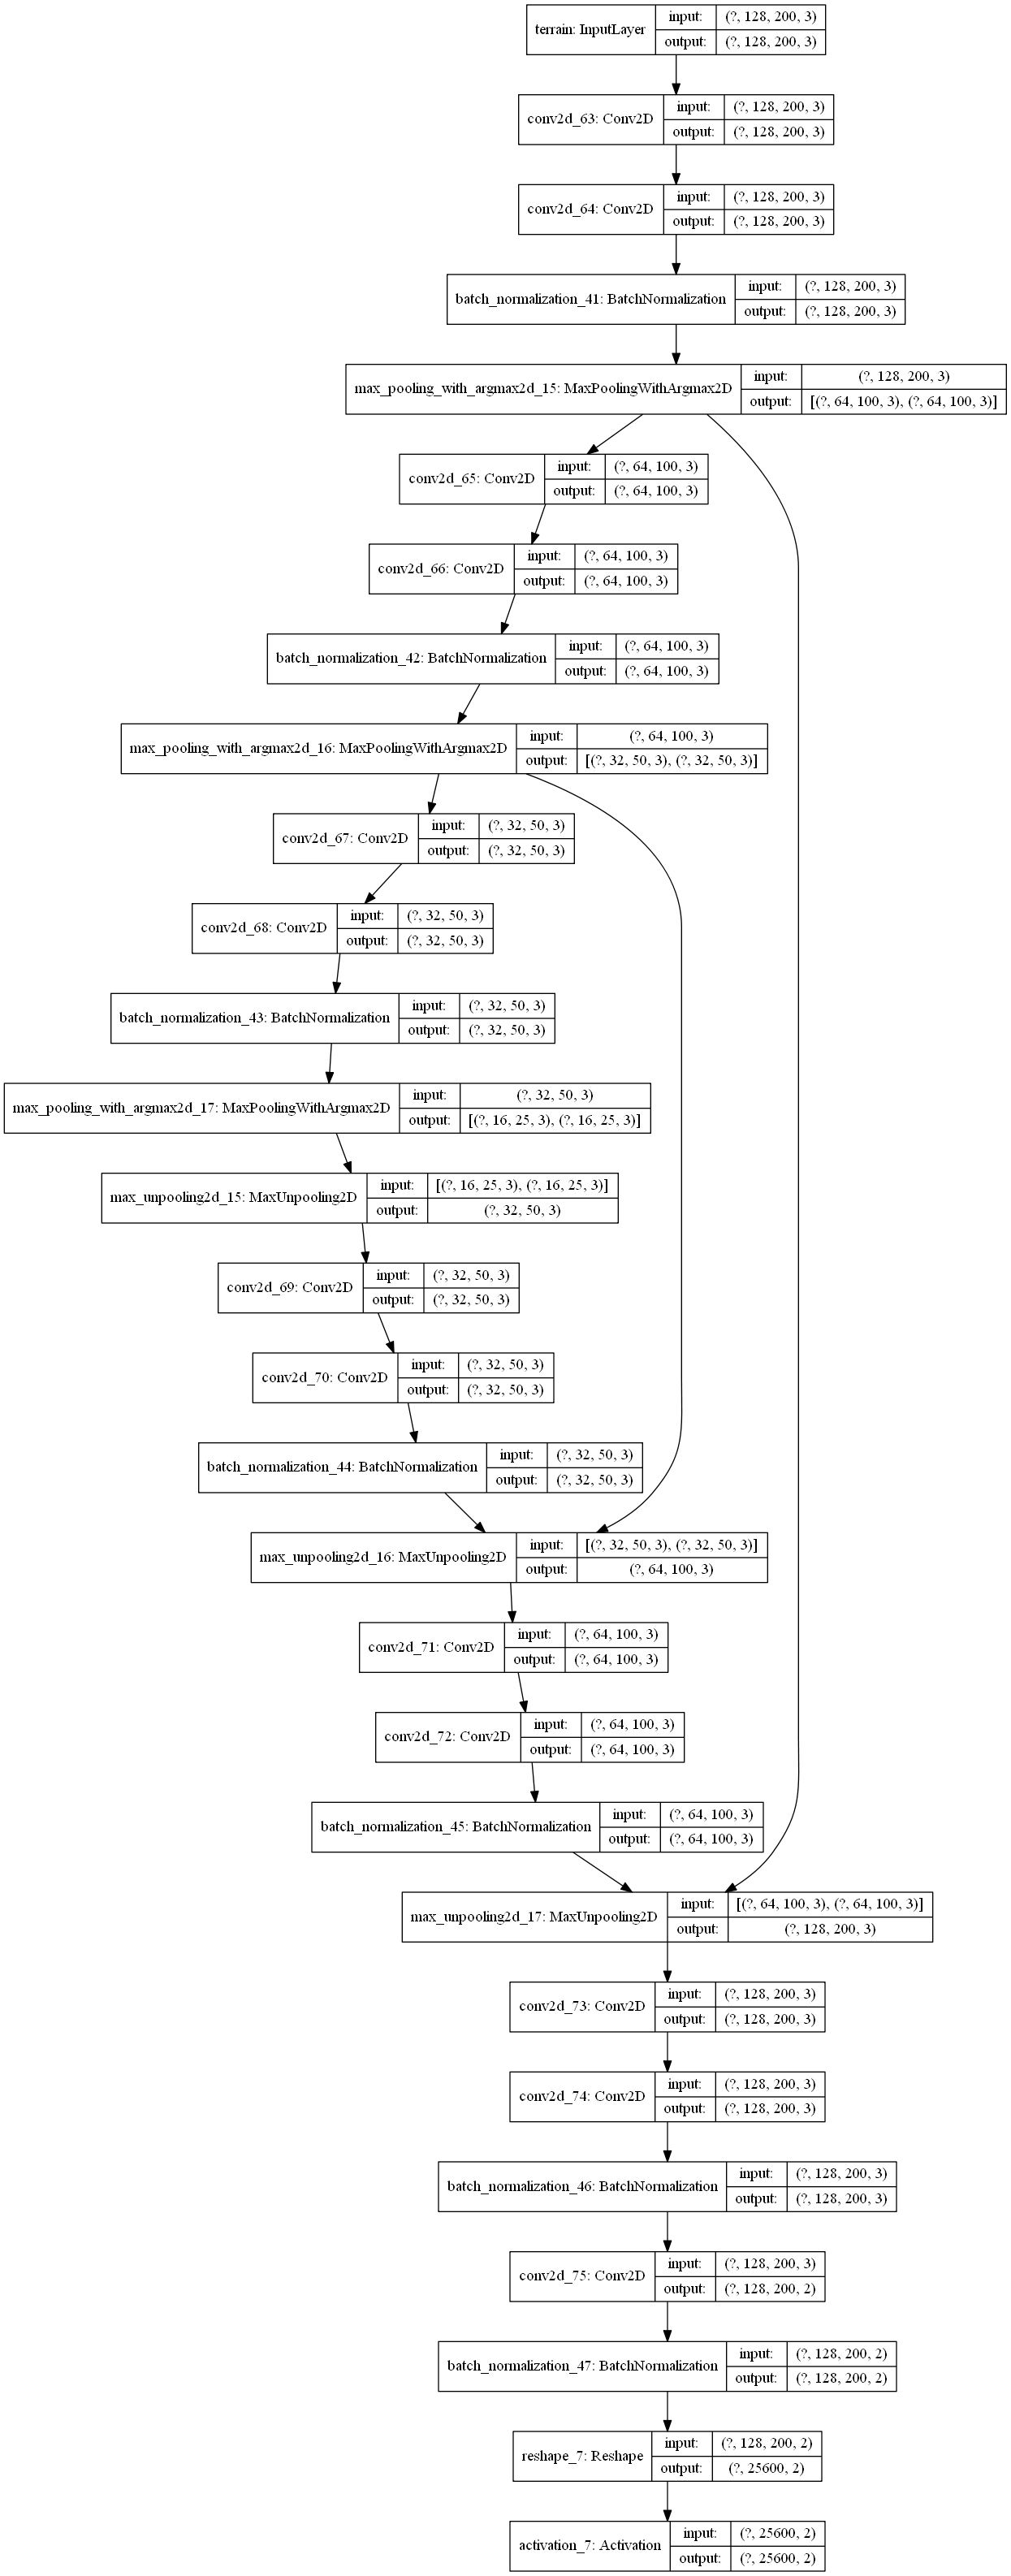

In [83]:
import pydotplus
import keras.utils
keras.utils.vis_utils.pydot = pydotplus
tf.keras.utils.plot_model(model, to_file="D:/Masterarbeit/Data/Randbereiche/model_full_unpool.png", show_shapes=True)

### Compile the model
    - which optimizer is apropriate for the Data?
    - is the loss function adequate?

In [169]:
sgd = keras.optimizers.SGD(lr=1e-4)
adam = keras.optimizers.adam(lr=0.001)
adadelta = keras.optimizers.Adadelta()

In [180]:
model.compile(optimizer=adam,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
             #sample_weight_mode = "temporal")

### Fit the model 

In [181]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath="D:/Masterarbeit/Data/Randbereiche/best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [183]:
history = model.fit_generator(datagen.flow(train_examples_scaled_reshape,train_labels_category , batch_size = batch_size),
                    #sample_weight=sample_weights),
                    class_weight = class_weights,
                    steps_per_epoch = steps_per_epoch,          
                    epochs=200,  
                    callbacks=[checkpointer],
                    validation_data = datagen.flow(test_examples_scaled_reshape,test_labels_category ),
                    validation_steps = val_steps)

Epoch 1/200
131/130 [==============================] - 75s 573ms/step - loss: 0.6865 - acc: 0.5313 - val_loss: 1.2503 - val_acc: 0.5755

Epoch 00001: val_acc improved from -inf to 0.57553, saving model to D:/Masterarbeit/Data/Randbereiche/best_weights.hdf5
Epoch 2/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6863 - acc: 0.5316 - val_loss: 1.3226 - val_acc: 0.5853

Epoch 00002: val_acc improved from 0.57553 to 0.58528, saving model to D:/Masterarbeit/Data/Randbereiche/best_weights.hdf5
Epoch 3/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6863 - acc: 0.5314 - val_loss: 1.4807 - val_acc: 0.5759

Epoch 00003: val_acc did not improve from 0.58528
Epoch 4/200
131/130 [==============================] - 74s 567ms/step - loss: 0.6862 - acc: 0.5314 - val_loss: 1.6882 - val_acc: 0.5814

Epoch 00004: val_acc did not improve from 0.58528
Epoch 5/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6862 - acc: 0.5316 - val_loss


Epoch 00042: val_acc did not improve from 0.59751
Epoch 43/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6861 - acc: 0.5318 - val_loss: 0.6892 - val_acc: 0.5078

Epoch 00043: val_acc did not improve from 0.59751
Epoch 44/200
131/130 [==============================] - 75s 569ms/step - loss: 0.6862 - acc: 0.5315 - val_loss: 0.6915 - val_acc: 0.5381

Epoch 00044: val_acc did not improve from 0.59751
Epoch 45/200
131/130 [==============================] - 75s 569ms/step - loss: 0.6862 - acc: 0.5318 - val_loss: 0.6812 - val_acc: 0.5912

Epoch 00045: val_acc did not improve from 0.59751
Epoch 46/200
131/130 [==============================] - 74s 567ms/step - loss: 0.6862 - acc: 0.5314 - val_loss: 0.6841 - val_acc: 0.5097

Epoch 00046: val_acc did not improve from 0.59751
Epoch 47/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6862 - acc: 0.5316 - val_loss: 0.6804 - val_acc: 0.5850

Epoch 00047: val_acc did not improve from 0.59751
Epoch 48/


Epoch 00128: val_acc did not improve from 0.60057
Epoch 129/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6812 - acc: 0.5316 - val_loss: 0.6764 - val_acc: 0.5776

Epoch 00129: val_acc did not improve from 0.60057
Epoch 130/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6812 - acc: 0.5315 - val_loss: 0.6810 - val_acc: 0.5085

Epoch 00130: val_acc did not improve from 0.60057
Epoch 131/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6812 - acc: 0.5316 - val_loss: 0.6764 - val_acc: 0.5885

Epoch 00131: val_acc did not improve from 0.60057
Epoch 132/200
131/130 [==============================] - 74s 568ms/step - loss: 0.6812 - acc: 0.5318 - val_loss: 0.6784 - val_acc: 0.5930

Epoch 00132: val_acc did not improve from 0.60057
Epoch 133/200
131/130 [==============================] - 74s 567ms/step - loss: 0.6813 - acc: 0.5314 - val_loss: 0.6750 - val_acc: 0.5767

Epoch 00133: val_acc did not improve from 0.60057
Epoc

## View training history

In [184]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [221]:
model.save("D:/Masterarbeit/Data/Randbereiche/CNN_06.hdf5")

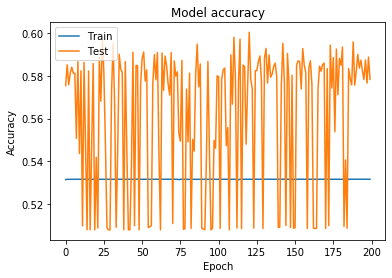

In [185]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

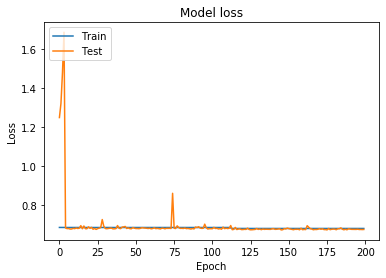

In [186]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Make Predictions

In [187]:
predictions = model.predict(test_examples)
preds_reshape = predictions.reshape(1632, 128,200,2)

In [188]:
preds = np.argmax(preds_reshape, axis=-1)

In [189]:
print(preds_reshape.shape)
print(preds.shape)
print(preds_reshape[19,:,:,0])
print(preds[19,:,:])

(1632, 128, 200, 2)
(1632, 128, 200)
[[0.99947923 0.9999405  0.99976295 ... 0.999964   0.9991159  0.9984511 ]
 [0.5213086  0.5213086  0.5213086  ... 0.5213086  0.5213086  0.5718866 ]
 [0.9960801  0.99994206 0.99942255 ... 0.99994445 0.99935645 0.9990306 ]
 ...
 [0.5321045  0.5213086  0.5315852  ... 0.5213086  0.52827054 0.5213086 ]
 [0.4967566  0.5213086  0.53662145 ... 0.5213086  0.5157089  0.5213086 ]
 [0.5213086  0.4983326  0.5213086  ... 0.4983326  0.50123    0.5198326 ]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]]


## Visualize Predictions

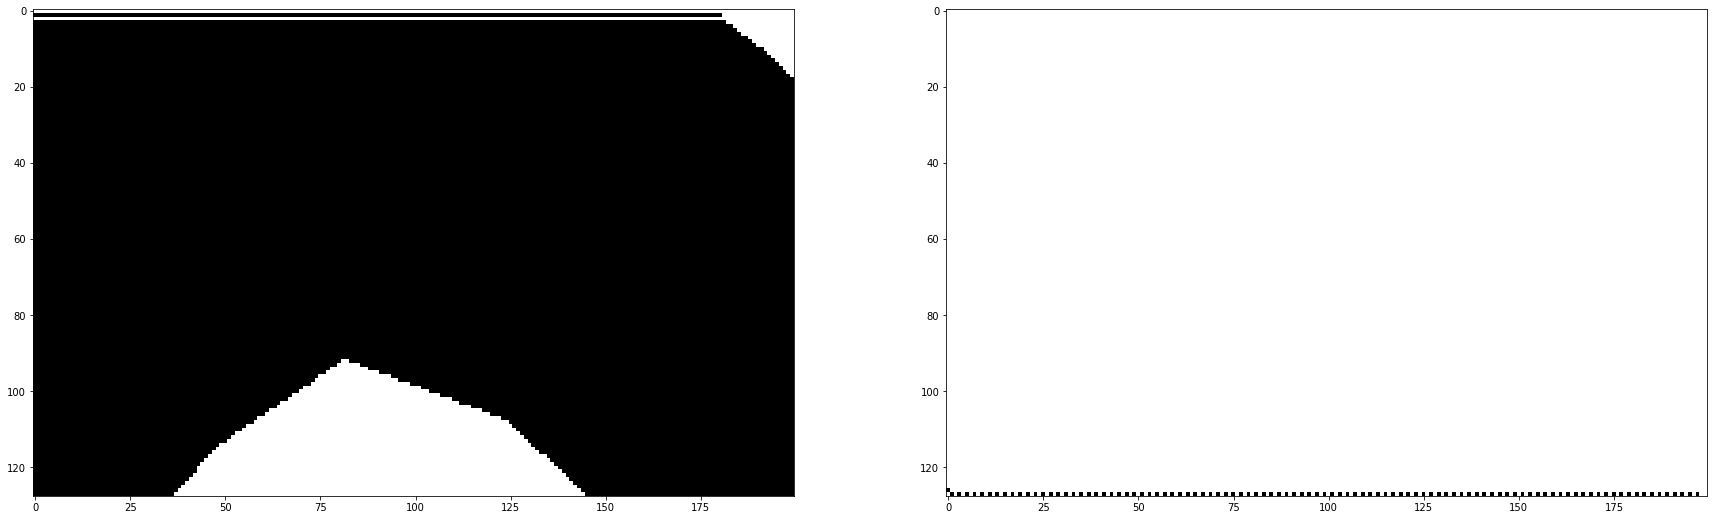

In [190]:
mask = test_labels[19,:,:,0]
predicted = preds[19,:,:]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,15))
im1 = ax1.imshow(mask, cmap = "binary")
im2 = ax2.imshow(predicted, cmap = "binary")
plt.show()